# Michipicoten Island Structural Analysis
This Jupyter notebook is provided as part of the Data Repository for a manuscript in review entitled **The end of Midcontinent Rift magmatism and the paleogeography of Laurentia** by Luke M. Fairchild, Nicholas L. Swanson-Hysell, Jahandar Ramenzani, Courtney J. Sprain, and Samuel A. Bowring.

The following is a walkthrough of all structural measurements made on Michipicoten Island, 2015, and associated calculations of the dip panels used for paleomagnetic data tilt-corrections. The structural variety among paleomagnetic sample sites necessitated unique tilt-corrections for different sites, unlike paleomagnetic data of the Schroeder-Lutsen basalts, which demonstrated uniform structure throughout their stratigraphy. The code can be downloaded and run interactively here [] or viewed statically within a web browser here []. This notebook is separate from the main *Data Analysis* notebook, which can be downloaded for interactive viewing here [] or viewed statically here []. 

**NOTE:** This code makes extensive use of the open-source software ```mplstereonet``` developed by Joe Kington (https://github.com/joferkington) and can be viewed/downloaded on GitHub (https://github.com/joferkington/mplstereonet). The open-source license is provided within this repository under the ```mplstereonet``` folder. 

In [1]:
import sys
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import mplstereonet
%matplotlib inline

/Users/lukefairchild765/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


All stratigraphic measurements are uploaded below from the ```ALL_planes.csv``` file. Ordering of the measurements below corresponds to their relative stratigraphic position within the Michipicoten Island Formation (first site = Deer Yard Member, the lowest stratigraphic interval measured).

Commonly used abbreviations throughout this notebook include 
* **CM - Cuesta Member andesite**
* **SS - South Shore Member basalt flows**

The South Shore Member basalt flows are exposed along the southern shore of Michipicoten Island and fall into three regions with distinct structure (as seen by the clustering of samples sites in Figure X in manuscript). To distinguish structural measurements among regions, **SSa** refers to the easternmost site cluster, **SSb** refers to the westernmost site cluster, and **SSc** refers to the site cluster in between. 

Structural measurements are presented in order (up stratigraphy). The measurements most pertinent to tilt-correction of paleomagnetic data are the [Cuesta Member](#Cuesta-Member) and [South Shore Member](#South-Shore-Member) sections below.

In [2]:
# import structural measurements
ALL_data = pd.read_csv('ALL_plane.csv',
                            usecols=["unitId","notes",
                                     "latitude","longitude",
                                     "planeType","dip",
                                     "dipAz_dc","declination"])
ALL_data.sort_values(by="unitId", inplace=True)
ALL_data.set_index(keys=['unitId'], drop=False,inplace=True)
units=ALL_data['unitId'].unique().tolist()

In [3]:
# display top five measurements
ALL_data.head()
# uncomment the line below to display all
# ALL_data

latitude  longitude     planeType   dip   dipAz_dc  declination  \
unitId                                                                     
CM1     47.723032 -85.952186  Flow Banding  32.0  174.65908    -6.659081   
CM1     47.723032 -85.952186  Flow Banding  36.0  159.65908    -6.659081   
CM1     47.723032 -85.952186  Flow Banding  35.0  158.65908    -6.659081   
CM1     47.723032 -85.952186  Flow Banding  36.0  163.65908    -6.659081   
CM1     47.723032 -85.952186  Flow Banding  30.0  161.65908    -6.659081   

       unitId    notes  
unitId                  
CM1       CM1  compass  
CM1       CM1  compass  
CM1       CM1  compass  
CM1       CM1  compass  
CM1       CM1  compass

In [4]:
CM_all = ALL_data.loc[["CM1","CM2"]]
CL_all = ALL_data.loc["Channel Lake Member"]
DY_all = ALL_data.loc["Deer Yard Member "]
ESB_all = ALL_data.loc["East Sand Bay Member"]
WSB_all = ALL_data.loc["West Sand Bay Member"]
SS_units = ['SS11','SS12','SS13','SS14','SS16','SS17','SS19','SS2','SS20','SS21','SS3',
            'SS4','SS5','SS6','SS7','SS15','SSc','South Shore Member','SSa_top','SSa limestone']
SS_all = ALL_data.loc[SS_units]

In [5]:
print SS_all["unitId"].unique()

['SS11' 'SS12' 'SS13' 'SS14' 'SS16' 'SS17' 'SS19' 'SS2' 'SS20' 'SS21' 'SS3'
 'SS4' 'SS5' 'SS6' 'SS7' 'SS15' 'SSc' 'South Shore Member' 'SSa_top'
 'SSa limestone']


# Site-by-site analysis

   * [Deer Yard Member](#Deer-Yard-Member)
   * [Cuesta Member](#Cuesta-Member)
   * [Channel Lake Member](#Channel-Lake-Member)
   * [West Sand Bay Member](#West-Sand-Bay-Member)
   * [South Shore Member](#South-Shore-Member)
   * [East Sand Bay Member](#East-Sand-Bay-Member)
   * [COMBINED SITES](#Compiled-sites)

In [6]:
# Create overall dataframe for compiled site means
site_means = pd.DataFrame(columns=['site_name','mean_strike','mean_dip', 'section'])

## Deer Yard Member

In [7]:
DY_analysis = pd.DataFrame(columns=["dip","dip_dir","pole_trend", "pole_plunge"])
DY_analysis["dip"] = DY_all['dip']
DY_analysis["dip_dir"] = DY_all['dipAz_dc']
DY_analysis['pole_trend'] = (DY_all['dipAz_dc']+180)%360
DY_analysis['pole_plunge'] = 90 - DY_all['dip']

In [8]:
DY_poles = ipmag.make_di_block(DY_analysis['pole_trend'],DY_analysis['pole_plunge'])
# take Fisher mean of poles orthogonal to planes
DY_poles_mean = pmag.fisher_mean(DY_poles)

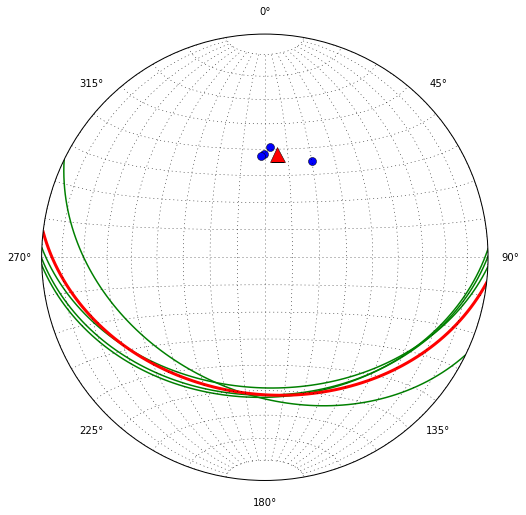

Deer Yard Member (no paleomagnetic data)
Mean strike = 96.56 Mean dip = 38.52


In [9]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

DY_mean_strike = DY_poles_mean['dec'] + 90.0
DY_mean_dip = 90.0 - DY_poles_mean['inc']

ax.plane(DY_analysis['dip_dir']-90,DY_analysis['dip'], 'g-', linewidth=1.5)
ax.pole(DY_analysis['dip_dir']-90,DY_analysis['dip'], 'bo', markersize=8)
ax.plane(DY_mean_strike,DY_mean_dip, 'r-', linewidth=3)
ax.pole(DY_mean_strike,DY_mean_dip, 'r^', markersize=15)
ax.grid()

plt.show()
print "Deer Yard Member (no paleomagnetic data)"
print "Mean strike = %3.2f Mean dip = %3.2f" % (DY_mean_strike,DY_mean_dip)
# Add to site_means dataframe
site_means.loc['DY'] = pd.Series({'site_name':'Deer Yard',
                               'mean_strike':DY_mean_strike, 
                               'mean_dip':DY_mean_dip})

## Cuesta Member

The Cuesta Member consists of two andesite flows. **CM1** is the lower flow and **CM2** is the upper flow.

### CM1

In [10]:
CM1 = CM_all.loc["CM1"]

In [11]:
CM1_bed = CM1.loc[CM1["planeType"]!="Joint"]
CM1_analysis = pd.DataFrame(columns=["dip","dip_dir","pole_trend", "pole_plunge"])
CM1_analysis["dip"] = CM1_bed['dip']
CM1_analysis["dip_dir"] = CM1_bed['dipAz_dc']
CM1_analysis['pole_trend'] = (CM1_bed['dipAz_dc']+180)%360
CM1_analysis['pole_plunge'] = 90 - CM1_bed['dip']
CM1_analysis.head()

dip    dip_dir  pole_trend  pole_plunge
unitId                                          
CM1     32.0  174.65908   354.65908         58.0
CM1     36.0  159.65908   339.65908         54.0
CM1     35.0  158.65908   338.65908         55.0
CM1     36.0  163.65908   343.65908         54.0
CM1     30.0  161.65908   341.65908         60.0

In [12]:
CM1_poles = ipmag.make_di_block(CM1_analysis['pole_trend'],CM1_analysis['pole_plunge'])
CM1_poles_mean = pmag.fisher_mean(CM1_poles)
CM1_poles_mean

{'alpha95': 2.6833996376206559,
 'csd': 8.5095319053769209,
 'dec': 351.86815952857728,
 'inc': 58.191686332651713,
 'k': 90.606362575630001,
 'n': 32,
 'r': 31.657860672045807}

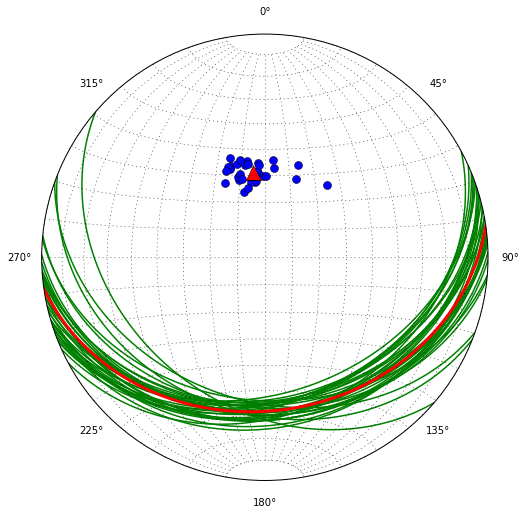

Site CM1
Mean strike = 441.87 Mean dip = 31.81


In [13]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

CM1_mean_strike = CM1_poles_mean['dec'] + 90.0
CM1_mean_dip = 90.0 - CM1_poles_mean['inc']

ax.plane(CM1_analysis['dip_dir']-90,CM1_analysis['dip'], 'g-', linewidth=1.5)
ax.pole(CM1_analysis['dip_dir']-90,CM1_analysis['dip'], 'bo', markersize=8)
ax.plane(CM1_mean_strike,CM1_mean_dip, 'r-', linewidth=3)
ax.pole(CM1_mean_strike,CM1_mean_dip, 'r^', markersize=15)
ax.grid()

plt.show()
print "Site CM1"
print "Mean strike = %3.2f Mean dip = %3.2f" % (CM1_mean_strike, CM1_mean_dip)

site_means.loc['CM1'] = pd.Series({'site_name':'CM1',
                               'mean_strike':CM1_mean_strike, 
                               'mean_dip':CM1_mean_dip})

### CM2

In [14]:
CM2 = CM_all.loc["CM2"]

In [15]:
CM2_bed = CM2.loc[CM2["planeType"]!="Joint"]
CM2_analysis = pd.DataFrame(columns=["dip","dip_dir","pole_trend", "pole_plunge"])
CM2_analysis["dip"] = CM2_bed['dip']
CM2_analysis["dip_dir"] = CM2_bed['dipAz_dc']
CM2_analysis['pole_trend'] = (CM2_bed['dipAz_dc']+180)%360
CM2_analysis['pole_plunge'] = 90 - CM2_bed['dip']

CM2_analysis.head()

dip    dip_dir  pole_trend  pole_plunge
unitId                                          
CM2     24.0  183.65908     3.65908         66.0
CM2     19.0  178.65908   358.65908         71.0
CM2     24.0  181.65908     1.65908         66.0
CM2     27.0  170.65908   350.65908         63.0
CM2     26.0  174.65908   354.65908         64.0

In [16]:
CM2_poles = ipmag.make_di_block(CM2_analysis['pole_trend'],CM2_analysis['pole_plunge'])
CM2_poles_mean = pmag.fisher_mean(CM2_poles)
CM2_poles_mean

{'alpha95': 2.0276674417184011,
 'csd': 5.4144162147118822,
 'dec': 357.68744420206446,
 'inc': 64.499278642324953,
 'k': 223.8034425224829,
 'n': 23,
 'r': 22.901699456665909}

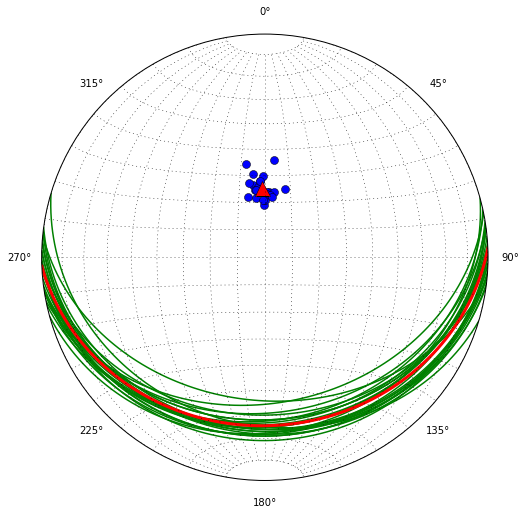

Site CM2
Mean strike = 447.69 Mean dip = 25.50


In [17]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

CM2_mean_strike = CM2_poles_mean['dec'] + 90.0
CM2_mean_dip = 90.0 - CM2_poles_mean['inc']

ax.plane(CM2_analysis['dip_dir']-90,CM2_analysis['dip'], 'g-', linewidth=1.5)
ax.pole(CM2_analysis['dip_dir']-90,CM2_analysis['dip'], 'bo', markersize=8)
ax.plane(CM2_mean_strike,CM2_mean_dip, 'r-', linewidth=3)
ax.pole(CM2_mean_strike,CM2_mean_dip, 'r^', markersize=15)
ax.grid()

plt.show()
print "Site CM2"
print "Mean strike = %3.2f Mean dip = %3.2f" % (CM2_mean_strike,CM2_mean_dip)

site_means.loc['CM2'] = pd.Series({'site_name':'CM2',
                               'mean_strike':CM2_mean_strike, 
                               'mean_dip':CM2_mean_dip})

## Channel Lake Member

The Channel Lake Member comprises a single andesite flow. Both bedding measurements and columnar jointing measurements were taken to extract overall tilt.

### Columnar jointing

In [18]:
# Extract measurements of columnar jointing
CL_joint = CL_all.loc[CL_all["planeType"]=="Joint"]

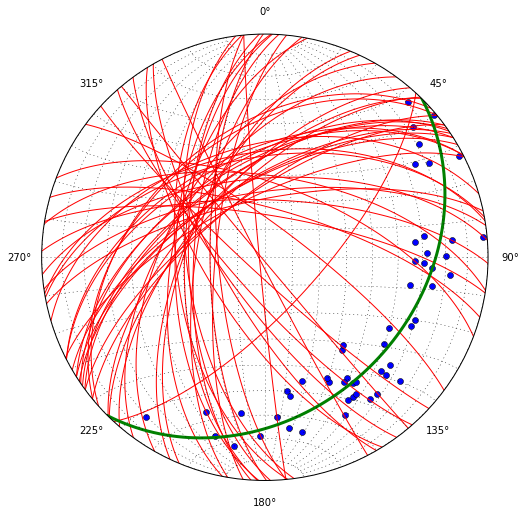

Channel Lake Member (no paleomagnetic data)
This analysis of columnar joints gives an estimated strike/dip of 44.76/32.57


In [19]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

# Plot the poles to the measured planes 
# (the planes are not necessary but are also plotted for visual effect)
ax.pole(CL_joint["dipAz_dc"]-90,CL_joint["dip"])
ax.plane(CL_joint["dipAz_dc"]-90,CL_joint["dip"], 'r-', linewidth=1)
# Fit a "girdle" to the data - in effect, you are making
# a best-fit plane through the poles
s,d=mplstereonet.fit_girdle(CL_joint["dipAz_dc"]-90,CL_joint["dip"])
ax.plane(s,d, linewidth=3)
ax.grid()

plt.show()
# Print extracted results - associated error is not currently given by this code, 
# but it would be calculated by taking the Fisher mean of all intersection points
# of the planes plotted below. 
print "Channel Lake Member (no paleomagnetic data)"
print "This analysis of columnar joints gives an estimated strike/dip of \
%3.2f/%3.2f" % (s,d)

### Bedding measurements

In [20]:
CL_bed = CL_all.loc[CL_all["planeType"]!="Joint"]
CL_analysis = pd.DataFrame(columns=["dip","dip_dir","pole_trend", "pole_plunge"])
CL_analysis["dip"] = CL_bed['dip']
CL_analysis["dip_dir"] = CL_bed['dipAz_dc']
CL_analysis['pole_trend'] = (CL_bed['dipAz_dc']+180)%360
CL_analysis['pole_plunge'] = 90 - CL_bed['dip']
CL_analysis = CL_analysis.append(pd.Series({"dip":d,"dip_dir":s+90,"pole_trend":s-90,"pole_plunge":90-d}), ignore_index=True)
CL_analysis.head()

dip     dip_dir  pole_trend  pole_plunge
0  36.000000  152.582039  332.582039    54.000000
1  37.000000  153.582039  333.582039    53.000000
2  37.000000  162.582039  342.582039    53.000000
3  38.000000  159.582039  339.582039    52.000000
4  34.868553  152.791199  332.791199    55.131447

In [21]:
CL_poles = ipmag.make_di_block(CL_analysis['pole_trend'],CL_analysis['pole_plunge'])
CL_poles_mean = pmag.fisher_mean(CL_poles)
CL_poles_mean

{'alpha95': 3.4015186113723721,
 'csd': 5.3402448273802277,
 'dec': 331.20510652106549,
 'inc': 53.740055132788832,
 'k': 230.06348897532914,
 'n': 9,
 'r': 8.9652269900120576}

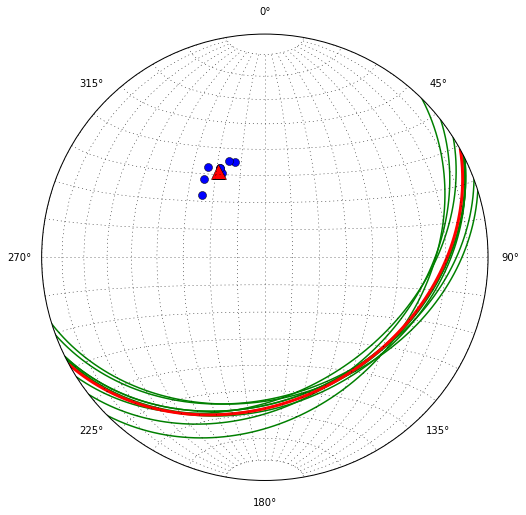

Channel Lake Member (no paleomagnetic data)
Mean strike = 421.21 Mean dip = 36.26


In [22]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

CL_mean_strike = CL_poles_mean['dec'] + 90.0
CL_mean_dip = 90.0 - CL_poles_mean['inc']

ax.plane(CL_analysis['dip_dir']-90,CL_analysis['dip'], 'g-', linewidth=1.5)
ax.pole(CL_analysis['dip_dir']-90,CL_analysis['dip'], 'bo', markersize=8)
ax.plane(CL_mean_strike,CL_mean_dip, 'r-', linewidth=3)
ax.pole(CL_mean_strike,CL_mean_dip, 'r^', markersize=15)
ax.grid()

plt.show()
print "Channel Lake Member (no paleomagnetic data)"
print "Mean strike = %3.2f Mean dip = %3.2f" % (CL_mean_strike,CL_mean_dip)

site_means.loc['CL'] = pd.Series({'site_name':'CL',
                               'mean_strike':CL_mean_strike, 
                               'mean_dip':CL_mean_dip})

## West Sand Bay Member

In [23]:
WSB_bed = WSB_all.loc[WSB_all["planeType"]!="Joint"]
WSB_analysis = pd.DataFrame(columns=["dip","dip_dir","pole_trend", "pole_plunge"])
WSB_analysis["dip"] = WSB_bed['dip']
WSB_analysis["dip_dir"] = WSB_bed['dipAz_dc']
WSB_analysis['pole_trend'] = (WSB_bed['dipAz_dc']+180)%360
WSB_analysis['pole_plunge'] = 90 - WSB_bed['dip']

WSB_analysis.head()

dip     dip_dir  pole_trend  pole_plunge
unitId                                                              
West Sand Bay Member  22.503855  172.869705  352.869705    67.496145
West Sand Bay Member  53.797546  193.586029   13.586029    36.202454
West Sand Bay Member  43.944832  178.899383  358.899383    46.055168
West Sand Bay Member  51.093864  169.650269  349.650269    38.906136
West Sand Bay Member  44.345737  152.920502  332.920502    45.654263

In [24]:
WSB_poles = ipmag.make_di_block(WSB_analysis['pole_trend'],WSB_analysis['pole_plunge'])
WSB_poles_mean = pmag.fisher_mean(WSB_poles)
WSB_poles_mean

{'alpha95': 7.9719752755828051,
 'csd': 13.19534769245014,
 'dec': 354.1784827609327,
 'inc': 48.301658915856038,
 'k': 37.681515511931728,
 'n': 10,
 'r': 9.7611561032583687}

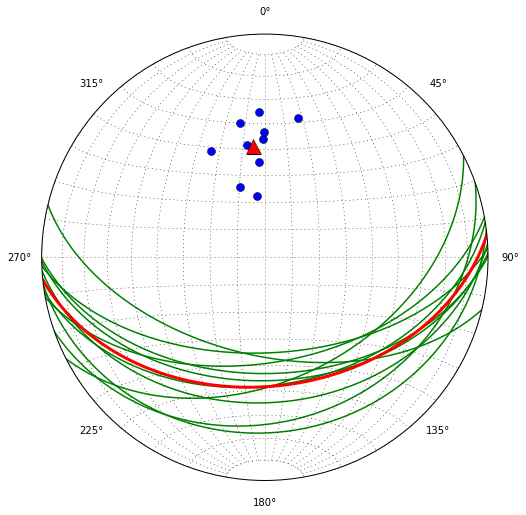

West Sand Bay Member (no paleomagnetic data)
Mean strike = 444.18 Mean dip = 41.70


In [25]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

WSB_mean_strike = WSB_poles_mean['dec'] + 90.0
WSB_mean_dip = 90.0 - WSB_poles_mean['inc']

ax.plane(WSB_analysis['dip_dir']-90,WSB_analysis['dip'], 'g-', linewidth=1.5)
ax.pole(WSB_analysis['dip_dir']-90,WSB_analysis['dip'], 'bo', markersize=8)
ax.plane(WSB_mean_strike,WSB_mean_dip, 'r-', linewidth=3)
ax.pole(WSB_mean_strike,WSB_mean_dip, 'r^', markersize=15)
ax.grid()

plt.show()
print "West Sand Bay Member (no paleomagnetic data)"
print "Mean strike = %3.2f Mean dip = %3.2f" % (WSB_mean_strike,WSB_mean_dip)

site_means.loc['WSB'] = pd.Series({'site_name':'WSB',
                               'mean_strike':WSB_mean_strike, 
                               'mean_dip':WSB_mean_dip})

## South Shore Member

The South Shore Member stratigraphy can be ordered as follows (from basal flow to the topmost flow): 
* [Region "SSB"](#SSB) - 8, 4, 5, 9, 6, 7
* [Region "SSC"](#SSC) - 18, 19, 20, 21, 16, 17
* [Region "SSA"](#SSA) - 15, 14, 13, 12, 11, 10, 1, 3, 2

## SSB

South Shore flows collected near West Sand Bay.
   * [SS4](#SS4)
   * [SS5](#SS5)
   * [SS6](#SS6)
   * [SS7](#SS7)

### SS4

In [26]:
SS4 = SS_all.loc["SS4"]
SS4_joint = SS4.loc[SS4["planeType"]=="Joint"]

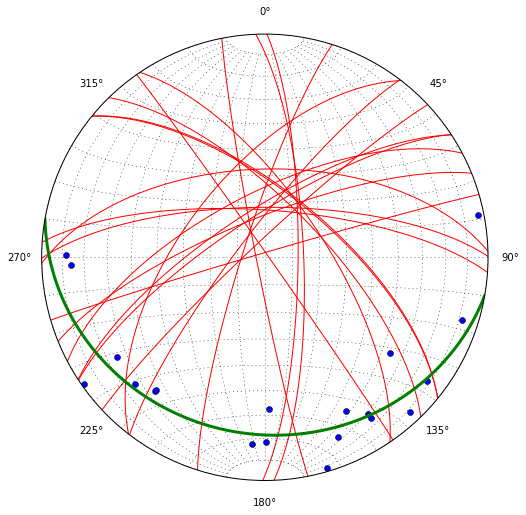

Site SS4
This analysis of columnar joints gives an estimated strike/dip of 99.85/21.77


In [27]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

ax.pole(SS4_joint["dipAz_dc"]-90,SS4_joint["dip"])
ax.plane(SS4_joint["dipAz_dc"]-90,SS4_joint["dip"], 'r-', linewidth=1)
s,d=mplstereonet.fit_girdle(SS4_joint["dipAz_dc"]-90,SS4_joint["dip"])
ax.plane(s,d, linewidth=3)
#ax.pole(mean_strike,mean_dip, 'r^', markersize=15)
#ax.pole(249.5898570444333, 70.969554667831176, markersize=8)
#s,d=mplstereonet.fit_girdle(SS4_joint_analysis['pole_trend'],SS4_joint_analysis['pole_plunge'])
#plunge,bearing = mplstereonet.pole2plunge_bearing(s,d)
#ax.plane(s,d, linewidth=4)
#ax.pole(s-90,90-d, markersize=15)
ax.grid()

plt.show()
print "Site SS4"
print "This analysis of columnar joints gives an estimated strike/dip of \
%3.2f/%3.2f" % (s,d)

In [28]:
SS4_bed = SS4.loc[SS4["planeType"]!="Joint"]
SS4_analysis = pd.DataFrame(columns=["dip","dip_dir","pole_trend", "pole_plunge"])
SS4_analysis["dip"] = SS4_bed['dip']
SS4_analysis["dip_dir"] = SS4_bed['dipAz_dc']
SS4_analysis['pole_trend'] = (SS4_bed['dipAz_dc']+180)%360
SS4_analysis['pole_plunge'] = 90 - SS4_bed['dip']
SS4_analysis = SS4_analysis.append(pd.Series({"dip":d,"dip_dir":s+90,"pole_trend":s-90,"pole_plunge":90-d}), ignore_index=True)
SS4_analysis.head()

dip     dip_dir  pole_trend  pole_plunge
0  28.360664  193.659638   13.659638    61.639336
1   9.172956   94.629517  274.629517    80.827044
2  45.000000  244.659081   64.659081    45.000000
3  20.740686  228.701996   48.701996    69.259314
4  21.767620  189.845921    9.845921    68.232380

In [29]:
SS4_poles = ipmag.make_di_block(SS4_analysis['pole_trend'],SS4_analysis['pole_plunge'])
SS4_poles_mean = pmag.fisher_mean(SS4_poles)
SS4_poles_mean

{'alpha95': 20.255061759117819,
 'csd': 20.761611378411406,
 'dec': 33.815470457946084,
 'inc': 69.533547611348595,
 'k': 15.221166011914958,
 'n': 5,
 'r': 4.737208043268903}

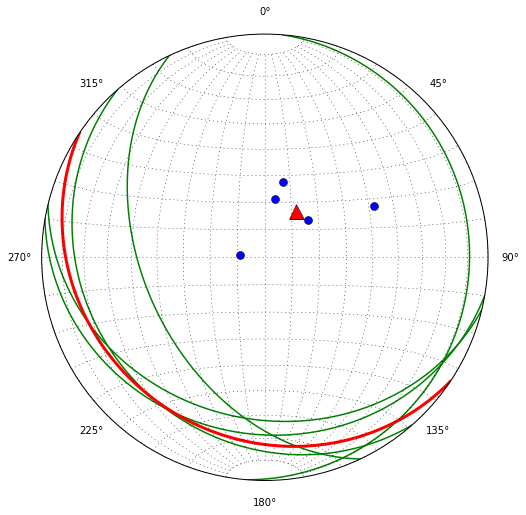

Site SS4
Mean strike = 123.82 Mean dip = 20.47


In [30]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

SS4_mean_strike = SS4_poles_mean['dec'] + 90.0
SS4_mean_dip = 90.0 - SS4_poles_mean['inc']

ax.plane(SS4_analysis['dip_dir']-90,SS4_analysis['dip'], 'g-', linewidth=1.5)
ax.pole(SS4_analysis['dip_dir']-90,SS4_analysis['dip'], 'bo', markersize=8)
ax.plane(SS4_mean_strike,SS4_mean_dip, 'r-', linewidth=3)
ax.pole(SS4_mean_strike,SS4_mean_dip, 'r^', markersize=15)
ax.grid()

plt.show()
print "Site SS4"
print "Mean strike = %3.2f Mean dip = %3.2f" % (SS4_mean_strike,SS4_mean_dip)

site_means.loc['SS4'] = pd.Series({'site_name':'SS4',
                               'mean_strike':SS4_mean_strike, 
                               'mean_dip':SS4_mean_dip,'section':'SSb'})

### SS5

In [31]:
SS5 = SS_all.loc["SS5"]
SS5_joint = SS5.loc[SS5["planeType"]=="Joint"]

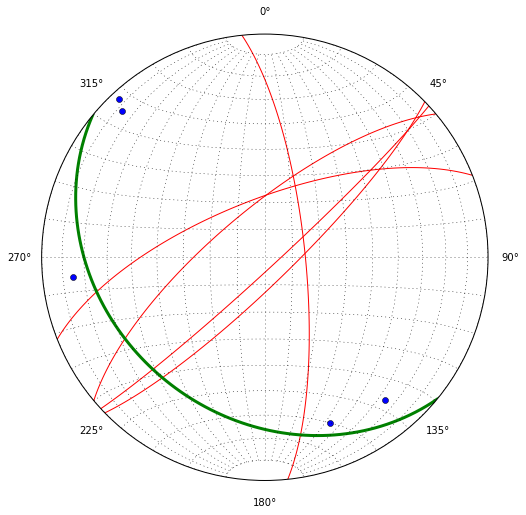

Site SS5
This analysis of columnar joints gives an estimated strike/dip of 129.48/29.87


In [32]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

ax.pole(SS5_joint["dipAz_dc"]-90,SS5_joint["dip"])
ax.plane(SS5_joint["dipAz_dc"]-90,SS5_joint["dip"], 'r-', linewidth=1)
s,d=mplstereonet.fit_girdle(SS5_joint["dipAz_dc"]-90,SS5_joint["dip"])
ax.plane(s,d, linewidth=3)
#ax.pole(mean_strike,mean_dip, 'r^', markersize=15)
#ax.pole(249.5898570444333, 70.969554667831176, markersize=8)
#s,d=mplstereonet.fit_girdle(SS4_joint_analysis['pole_trend'],SS4_joint_analysis['pole_plunge'])
#plunge,bearing = mplstereonet.pole2plunge_bearing(s,d)
#ax.plane(s,d, linewidth=4)
#ax.pole(s-90,90-d, markersize=15)
ax.grid()

plt.show()
print "Site SS5"
print "This analysis of columnar joints gives an estimated strike/dip of \
%3.2f/%3.2f" % (s,d)

In [33]:
SS5_bed = SS5.loc[SS5["planeType"]!="Joint"]
SS5_analysis = pd.DataFrame(columns=["dip","dip_dir","pole_trend", "pole_plunge"])
SS5_analysis["dip"] = SS5_bed['dip']
SS5_analysis["dip_dir"] = SS5_bed['dipAz_dc']
SS5_analysis['pole_trend'] = (SS5_bed['dipAz_dc']+180)%360
SS5_analysis['pole_plunge'] = 90 - SS5_bed['dip']
SS5_analysis = SS5_analysis.append(pd.Series({"dip":d,"dip_dir":s+90,"pole_trend":s-90,"pole_plunge":90-d}), ignore_index=True)
SS5_analysis.head()

dip     dip_dir  pole_trend  pole_plunge
0  60.845730   73.284004  253.284004    29.154270
1  35.043594  171.748795  351.748795    54.956406
2  37.559826  120.687538  300.687538    52.440174
3  47.889404  153.131531  333.131531    42.110596
4  29.106100  146.219955  326.219955    60.893900

In [34]:
SS5_poles = ipmag.make_di_block(SS5_analysis['pole_trend'],SS5_analysis['pole_plunge'])
SS5_poles_mean = pmag.fisher_mean(SS5_poles)
SS5_poles_mean

{'alpha95': 18.174701246713486,
 'csd': 27.027623179696814,
 'dec': 320.79183125475151,
 'inc': 55.427316918704122,
 'k': 8.981612769110173,
 'n': 9,
 'r': 8.109291370530487}

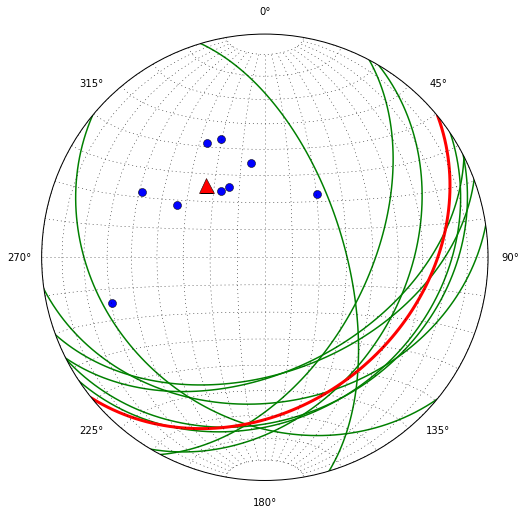

Site SS5
Mean strike = 410.79 Mean dip = 34.57


In [35]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

SS5_mean_strike = SS5_poles_mean['dec'] + 90.0
SS5_mean_dip = 90.0 - SS5_poles_mean['inc']

ax.plane(SS5_analysis['dip_dir']-90,SS5_analysis['dip'], 'g-', linewidth=1.5)
ax.pole(SS5_analysis['dip_dir']-90,SS5_analysis['dip'], 'bo', markersize=8)
ax.plane(SS5_mean_strike,SS5_mean_dip, 'r-', linewidth=3)
ax.pole(SS5_mean_strike,SS5_mean_dip, 'r^', markersize=15)
ax.grid()

plt.show()
print "Site SS5"
print "Mean strike = %3.2f Mean dip = %3.2f" % (SS5_mean_strike,SS5_mean_dip)

site_means.loc['SS5'] = pd.Series({'site_name':'SS5',
                               'mean_strike':SS5_mean_strike, 
                               'mean_dip':SS5_mean_dip,'section':'SSb'})

### SS6

In [36]:
SS6 = SS_all.loc["SS6"]
SS6_joint = SS6.loc[SS6["planeType"]=="Joint"]

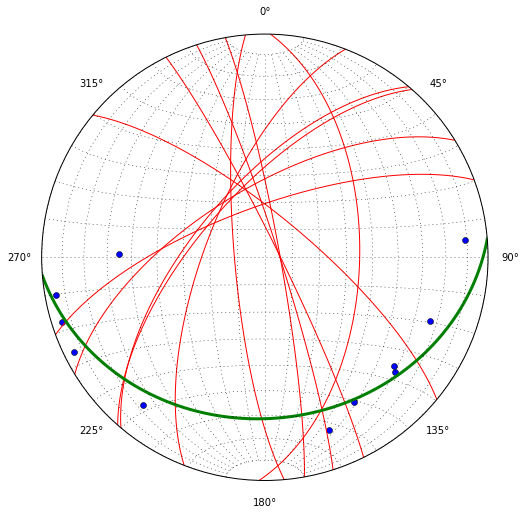

Site SS6
This analysis of columnar joints gives an estimated strike/dip of 85.28/28.56


In [37]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

ax.pole(SS6_joint["dipAz_dc"]-90,SS6_joint["dip"])
ax.plane(SS6_joint["dipAz_dc"]-90,SS6_joint["dip"], 'r-', linewidth=1)
s,d=mplstereonet.fit_girdle(SS6_joint["dipAz_dc"]-90,SS6_joint["dip"])
ax.plane(s,d, linewidth=3)
ax.grid()

plt.show()
print "Site SS6"
print "This analysis of columnar joints gives an estimated strike/dip of \
%3.2f/%3.2f" % (s,d)

In [38]:
SS6_bed = SS6.loc[SS6["planeType"]!="Joint"]
SS6_analysis = pd.DataFrame(columns=["dip","dip_dir","pole_trend", "pole_plunge"])
SS6_analysis["dip"] = SS6_bed['dip']
SS6_analysis["dip_dir"] = SS6_bed['dipAz_dc']
SS6_analysis['pole_trend'] = (SS6_bed['dipAz_dc']+180)%360
SS6_analysis['pole_plunge'] = 90 - SS6_bed['dip']
SS6_analysis = SS6_analysis.append(pd.Series({"dip":d,"dip_dir":s+90,"pole_trend":s-90,"pole_plunge":90-d}), ignore_index=True)
SS6_analysis.head()

dip     dip_dir  pole_trend  pole_plunge
0  24.214823  149.113464  329.113464    65.785177
1  26.223328  180.057510    0.057510    63.776672
2  30.893099  191.651276   11.651276    59.106901
3  25.777037  167.695526  347.695526    64.222963
4  21.780096  172.996780  352.996780    68.219904

In [39]:
SS6_poles = ipmag.make_di_block(SS6_analysis['pole_trend'],SS6_analysis['pole_plunge'])
SS6_poles_mean = pmag.fisher_mean(SS6_poles)
SS6_poles_mean

{'alpha95': 3.2475221288884186,
 'csd': 10.27254777142462,
 'dec': 358.44880038464964,
 'inc': 65.960068209270872,
 'k': 62.174700024321403,
 'n': 32,
 'r': 31.501404912482514}

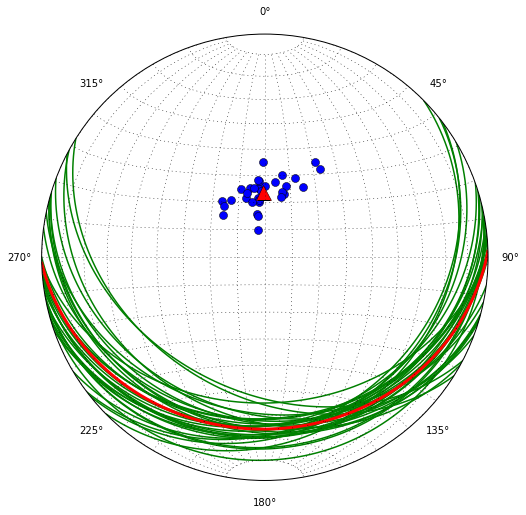

Site SS6
Mean strike = 448.45 Mean dip = 24.04


In [40]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

SS6_mean_strike = SS6_poles_mean['dec'] + 90.0
SS6_mean_dip = 90.0 - SS6_poles_mean['inc']

ax.plane(SS6_analysis['dip_dir']-90,SS6_analysis['dip'], 'g-', linewidth=1.5)
ax.pole(SS6_analysis['dip_dir']-90,SS6_analysis['dip'], 'bo', markersize=8)
ax.plane(SS6_mean_strike,SS6_mean_dip, 'r-', linewidth=3)
ax.pole(SS6_mean_strike,SS6_mean_dip, 'r^', markersize=15)
ax.grid()

plt.show()
print "Site SS6"
print "Mean strike = %3.2f Mean dip = %3.2f" % (SS6_mean_strike,SS6_mean_dip)

site_means.loc['SS6'] = pd.Series({'site_name':'SS6',
                               'mean_strike':SS6_mean_strike, 
                               'mean_dip':SS6_mean_dip,'section':'SSb'})

### SS7

In [41]:
SS7 = SS_all.loc["SS7"]

In [42]:
SS7_bed = SS7.loc[SS7["planeType"]!="Joint"]
SS7_analysis = pd.DataFrame(columns=["dip","dip_dir","pole_trend", "pole_plunge"])
SS7_analysis["dip"] = SS7_bed['dip']
SS7_analysis["dip_dir"] = SS7_bed['dipAz_dc']
SS7_analysis['pole_trend'] = (SS7_bed['dipAz_dc']+180)%360
SS7_analysis['pole_plunge'] = 90 - SS7_bed['dip']
SS7_analysis = SS7_analysis.append(pd.Series({"dip":d,"dip_dir":s+90,"pole_trend":s-90,"pole_plunge":90-d}), ignore_index=True)
SS7_analysis.head()

dip     dip_dir  pole_trend  pole_plunge
0  25.000000  190.582039   10.582039    65.000000
1  20.361092  179.138596  359.138596    69.638908
2  22.000000  201.582039   21.582039    68.000000
3  21.000000  188.582039    8.582039    69.000000
4  22.889442  180.495758    0.495758    67.110558

In [43]:
SS7_poles = ipmag.make_di_block(SS7_analysis['pole_trend'],SS7_analysis['pole_plunge'])
SS7_poles_mean = pmag.fisher_mean(SS7_poles)
SS7_poles_mean

{'alpha95': 2.2299740689009808,
 'csd': 6.6052983975919455,
 'dec': 8.8590198261811111,
 'inc': 68.073437940378099,
 'k': 150.37829416293599,
 'n': 28,
 'r': 27.820452811023742}

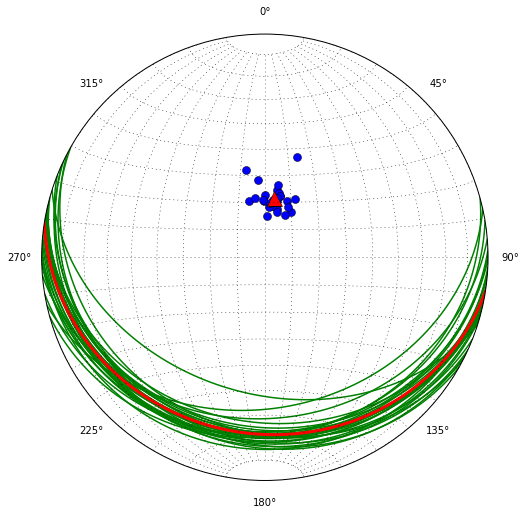

Site SS7
Mean strike = 98.86 Mean dip = 21.93


In [44]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

SS7_mean_strike = SS7_poles_mean['dec'] + 90.0
SS7_mean_dip = 90.0 - SS7_poles_mean['inc']

ax.plane(SS7_analysis['dip_dir']-90,SS7_analysis['dip'], 'g-', linewidth=1.5)
ax.pole(SS7_analysis['dip_dir']-90,SS7_analysis['dip'], 'bo', markersize=8)
ax.plane(SS7_mean_strike,SS7_mean_dip, 'r-', linewidth=3)
ax.pole(SS7_mean_strike,SS7_mean_dip, 'r^', markersize=15)
ax.grid()

plt.show()
print "Site SS7"
print "Mean strike = %3.2f Mean dip = %3.2f" % (SS7_mean_strike,SS7_mean_dip)

site_means.loc['SS7'] = pd.Series({'site_name':'SS7',
                               'mean_strike':SS7_mean_strike, 
                               'mean_dip':SS7_mean_dip,'section':'SSb'})

## SSC

South Shore flows collected near False Harbour.
   * [Unspecified](#SSc)
   * [SS19](#SS19)
   * [SS20](#SS20)
   * [SS21](#SS21)
   * [SS16](#SS16)
   * [SS17](#SS17)

### SS"c" region (unspecified)

In [45]:
SSc = SS_all.loc["SSc"]
SSc_joint = SSc.loc[SSc["planeType"]=="Joint"]

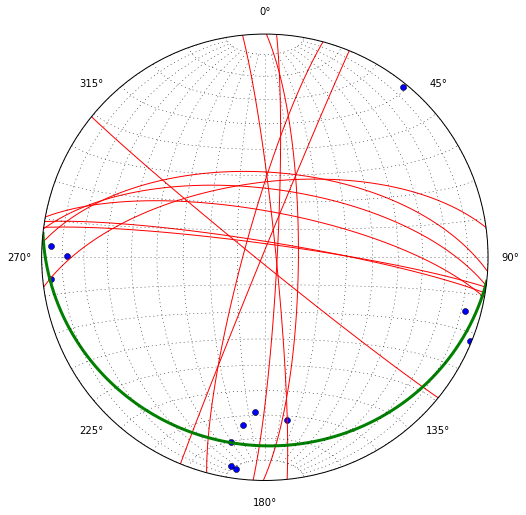

Region SSc
This analysis of columnar joints gives an estimated strike/dip of 96.17/16.73


In [46]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

ax.pole(SSc_joint["dipAz_dc"]-90,SSc_joint["dip"])
ax.plane(SSc_joint["dipAz_dc"]-90,SSc_joint["dip"], 'r-', linewidth=1)
s,d=mplstereonet.fit_girdle(SSc_joint["dipAz_dc"]-90,SSc_joint["dip"])
ax.plane(s,d, linewidth=3)
ax.grid()

plt.show()
print "Region SSc"
print "This analysis of columnar joints gives an estimated strike/dip of \
%3.2f/%3.2f" % (s,d)

#print mean_strike,mean_dip

In [47]:
SSc_bed = SSc.loc[SSc["planeType"]!="Joint"]
SSc_analysis = pd.DataFrame(columns=["dip","dip_dir","pole_trend", "pole_plunge"])
SSc_analysis["dip"] = SSc_bed['dip']
SSc_analysis["dip_dir"] = SSc_bed['dipAz_dc']
SSc_analysis['pole_trend'] = (SSc_bed['dipAz_dc']+180)%360
SSc_analysis['pole_plunge'] = 90 - SSc_bed['dip']
SSc_analysis = SSc_analysis.append(pd.Series({"dip":d,"dip_dir":s+90,"pole_trend":s-90,"pole_plunge":90-d}), ignore_index=True)
SSc_analysis.head()

dip     dip_dir  pole_trend  pole_plunge
0  18.083176  170.289230  350.289230    71.916824
1  24.146355  167.718353  347.718353    65.853645
2  15.239424  118.977264  298.977264    74.760576
3  24.289965  196.625427   16.625427    65.710035
4  18.444876  182.309799    2.309799    71.555124

In [48]:
SSc_poles = ipmag.make_di_block(SSc_analysis['pole_trend'],SSc_analysis['pole_plunge'])
SSc_poles_mean = pmag.fisher_mean(SSc_poles)
SSc_poles_mean

{'alpha95': 6.1051160969592519,
 'csd': 10.73855645545525,
 'dec': 341.7006874938167,
 'inc': 71.173237439381083,
 'k': 56.89554061490103,
 'n': 11,
 'r': 10.824239300797135}

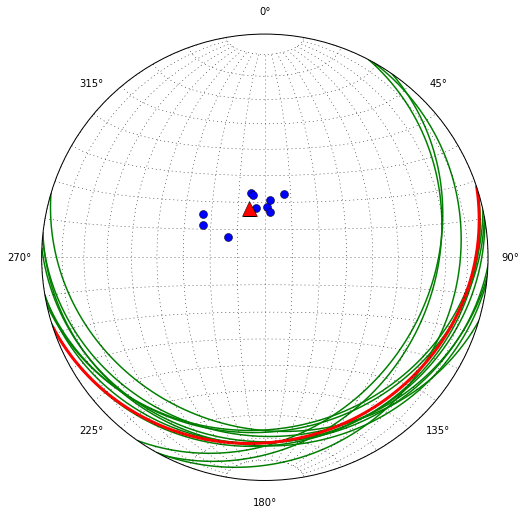

Region SSc
Mean strike = 431.70 Mean dip = 18.83


In [49]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

SSc_mean_strike = SSc_poles_mean['dec'] + 90.0
SSc_mean_dip = 90.0 - SSc_poles_mean['inc']

ax.plane(SSc_analysis['dip_dir']-90,SSc_analysis['dip'], 'g-', linewidth=1.5)
ax.pole(SSc_analysis['dip_dir']-90,SSc_analysis['dip'], 'bo', markersize=8)
ax.plane(SSc_mean_strike,SSc_mean_dip, 'r-', linewidth=3)
ax.pole(SSc_mean_strike,SSc_mean_dip, 'r^', markersize=15)
ax.grid()

plt.show()
print "Region SSc"
print "Mean strike = %3.2f Mean dip = %3.2f" % (SSc_mean_strike,SSc_mean_dip)

site_means.loc['SSc'] = pd.Series({'site_name':'SSc',
                               'mean_strike':SSc_mean_strike, 
                               'mean_dip':SSc_mean_dip,'section':'SSc'})

### SS19

In [50]:
SS19 = SS_all.loc["SS19"]
SS19_joint = SS19.loc[SS19["planeType"]=="Joint"]

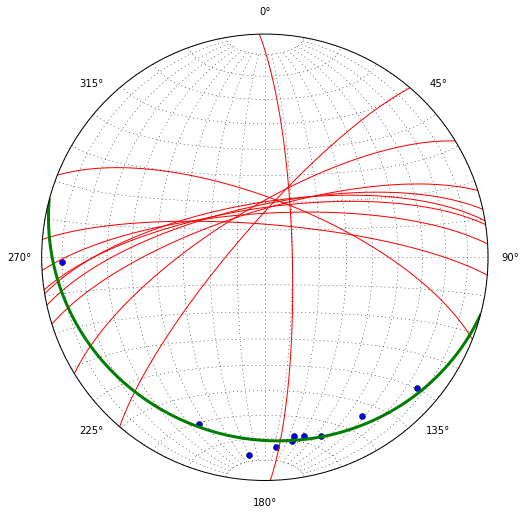

Site SS19
This analysis of columnar joints gives an estimated strike/dip of 104.97/19.66


In [51]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

ax.pole(SS19_joint["dipAz_dc"]-90,SS19_joint["dip"])
ax.plane(SS19_joint["dipAz_dc"]-90,SS19_joint["dip"], 'r-', linewidth=1)
s,d=mplstereonet.fit_girdle(SS19_joint["dipAz_dc"]-90,SS19_joint["dip"])
ax.plane(s,d, linewidth=3)
ax.grid()

plt.show()
print "Site SS19"
print "This analysis of columnar joints gives an estimated strike/dip of \
%3.2f/%3.2f" % (s,d)

In [52]:
SS19_bed = SS19.loc[SS19["planeType"]!="Joint"]
SS19_analysis = pd.DataFrame(columns=["dip","dip_dir","pole_trend", "pole_plunge"])
SS19_analysis["dip"] = SS19_bed['dip']
SS19_analysis["dip_dir"] = SS19_bed['dipAz_dc']
SS19_analysis['pole_trend'] = (SS19_bed['dipAz_dc']+180)%360
SS19_analysis['pole_plunge'] = 90 - SS19_bed['dip']
SS19_analysis = SS19_analysis.append(pd.Series({"dip":d,"dip_dir":s+90,"pole_trend":s-90,"pole_plunge":90-d}), ignore_index=True)
SS19_analysis.head()

dip     dip_dir  pole_trend  pole_plunge
0  14.0  180.582039    0.582039         76.0
1  16.0  189.582039    9.582039         74.0
2  21.0  182.582039    2.582039         69.0
3  14.0  176.582039  356.582039         76.0
4  22.0  176.582039  356.582039         68.0

In [53]:
SS19_poles = ipmag.make_di_block(SS19_analysis['pole_trend'],SS19_analysis['pole_plunge'])
SS19_poles_mean = pmag.fisher_mean(SS19_poles)
SS19_poles_mean

{'alpha95': 2.1164794585651139,
 'csd': 4.4767631423787799,
 'dec': 1.3094370834619597,
 'inc': 74.27750140511489,
 'k': 327.37220477398608,
 'n': 15,
 'r': 14.957235220963046}

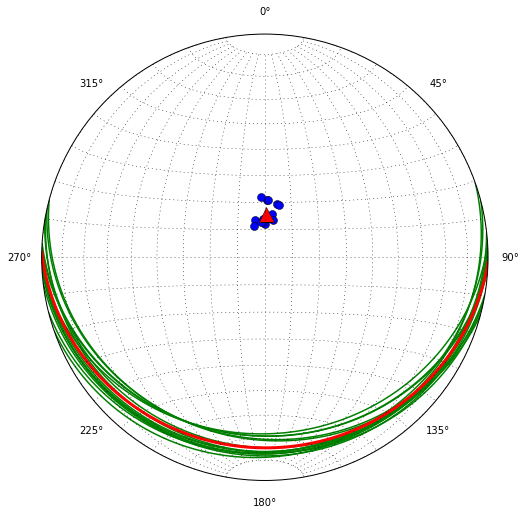

Site SS19
Mean strike = 91.31 Mean dip = 15.72


In [54]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

SS19_mean_strike = SS19_poles_mean['dec'] + 90.0
SS19_mean_dip = 90.0 - SS19_poles_mean['inc']

ax.plane(SS19_analysis['dip_dir']-90,SS19_analysis['dip'], 'g-', linewidth=1.5)
ax.pole(SS19_analysis['dip_dir']-90,SS19_analysis['dip'], 'bo', markersize=8)
ax.plane(SS19_mean_strike,SS19_mean_dip, 'r-', linewidth=3)
ax.pole(SS19_mean_strike,SS19_mean_dip, 'r^', markersize=15)
ax.grid()

plt.show()
print "Site SS19"
print "Mean strike = %3.2f Mean dip = %3.2f" % (SS19_mean_strike,SS19_mean_dip)

site_means.loc['SS19'] = pd.Series({'site_name':'SS19',
                               'mean_strike':SS19_mean_strike, 
                               'mean_dip':SS19_mean_dip,'section':'SSc'})

### SS20

In [55]:
SS20 = SS_all.loc["SS20"]

In [56]:
SS20_bed = SS20.loc[SS20["planeType"]!="Joint"]
SS20_analysis = pd.DataFrame(columns=["dip","dip_dir","pole_trend", "pole_plunge"])
SS20_analysis["dip"] = SS20_bed['dip']
SS20_analysis["dip_dir"] = SS20_bed['dipAz_dc']
SS20_analysis['pole_trend'] = (SS20_bed['dipAz_dc']+180)%360
SS20_analysis['pole_plunge'] = 90 - SS20_bed['dip']
SS20_analysis = SS20_analysis.append(pd.Series({"dip":d,"dip_dir":s+90,"pole_trend":s-90,"pole_plunge":90-d}), ignore_index=True)
SS20_analysis.head()

dip     dip_dir  pole_trend  pole_plunge
0  16.0  184.582039    4.582039         74.0
1  23.0  181.582039    1.582039         67.0
2  18.0  176.582039  356.582039         72.0
3  23.0  188.582039    8.582039         67.0
4  15.0  177.582039  357.582039         75.0

In [57]:
SS20_poles = ipmag.make_di_block(SS20_analysis['pole_trend'],SS20_analysis['pole_plunge'])
SS20_poles_mean = pmag.fisher_mean(SS20_poles)
SS20_poles_mean

{'alpha95': 2.7953334049741287,
 'csd': 4.0825194982240776,
 'dec': 3.9417152865804335,
 'inc': 70.526146075163098,
 'k': 393.6529429038651,
 'n': 8,
 'r': 7.9822178390224572}

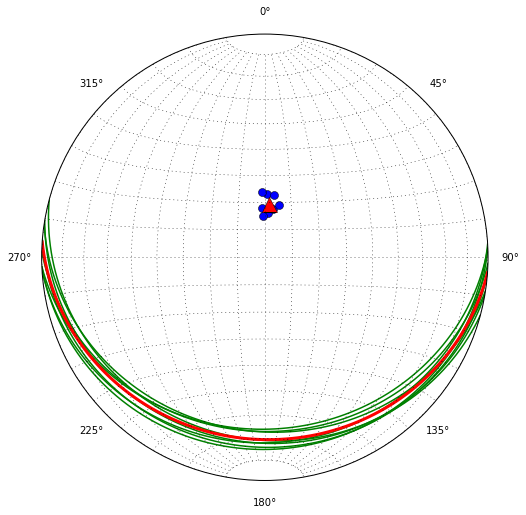

Site SS20
Mean strike = 93.94 Mean dip = 19.47


In [58]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

SS20_mean_strike = SS20_poles_mean['dec'] + 90.0
SS20_mean_dip = 90.0 - SS20_poles_mean['inc']

ax.plane(SS20_analysis['dip_dir']-90,SS20_analysis['dip'], 'g-', linewidth=1.5)
ax.pole(SS20_analysis['dip_dir']-90,SS20_analysis['dip'], 'bo', markersize=8)
ax.plane(SS20_mean_strike,SS20_mean_dip, 'r-', linewidth=3)
ax.pole(SS20_mean_strike,SS20_mean_dip, 'r^', markersize=15)
ax.grid()

plt.show()
print "Site SS20"
print "Mean strike = %3.2f Mean dip = %3.2f" % (SS20_mean_strike,SS20_mean_dip)

site_means.loc['SS20'] = pd.Series({'site_name':'SS20',
                               'mean_strike':SS20_mean_strike, 
                               'mean_dip':SS20_mean_dip,'section':'SSc'})

### SS21

In [59]:
SS21 = SS_all.loc["SS21"]
SS21_joint = SS21.loc[SS21["planeType"]=="Joint"]

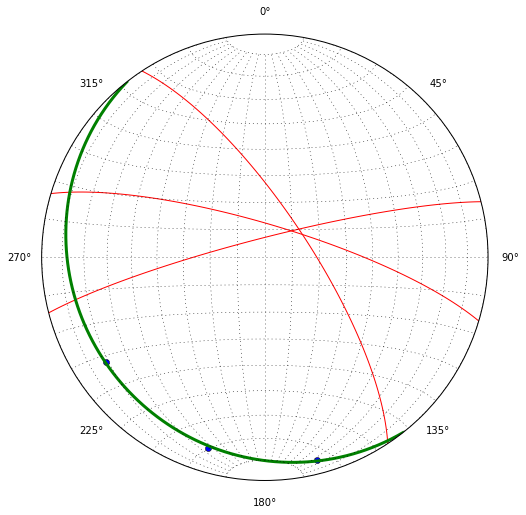

Site SS21
This analysis of columnar joints gives an estimated strike/dip of 141.79/15.59


In [60]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

ax.pole(SS21_joint["dipAz_dc"]-90,SS21_joint["dip"])
ax.plane(SS21_joint["dipAz_dc"]-90,SS21_joint["dip"], 'r-', linewidth=1)
s,d=mplstereonet.fit_girdle(SS21_joint["dipAz_dc"]-90,SS21_joint["dip"])
ax.plane(s,d, linewidth=3)
ax.grid()

plt.show()
print "Site SS21"
print "This analysis of columnar joints gives an estimated strike/dip of \
%3.2f/%3.2f" % (s,d)

In [61]:
SS21_bed = SS21.loc[SS21["planeType"]!="Joint"]
SS21_analysis = pd.DataFrame(columns=["dip","dip_dir","pole_trend", "pole_plunge"])
SS21_analysis["dip"] = SS21_bed['dip']
SS21_analysis["dip_dir"] = SS21_bed['dipAz_dc']
SS21_analysis['pole_trend'] = (SS21_bed['dipAz_dc']+180)%360
SS21_analysis['pole_plunge'] = 90 - SS21_bed['dip']
SS21_analysis = SS21_analysis.append(pd.Series({"dip":d,"dip_dir":s+90,"pole_trend":s-90,"pole_plunge":90-d}), ignore_index=True)
SS21_analysis.head()

dip     dip_dir  pole_trend  pole_plunge
0  16.0  174.582039  354.582039         74.0
1  21.0  181.582039    1.582039         69.0
2  20.0  184.582039    4.582039         70.0
3  20.0  181.582039    1.582039         70.0
4  19.0  188.582039    8.582039         71.0

In [62]:
SS21_poles = ipmag.make_di_block(SS21_analysis['pole_trend'],SS21_analysis['pole_plunge'])
SS21_poles_mean = pmag.fisher_mean(SS21_poles)
SS21_poles_mean

{'alpha95': 2.722734357869252,
 'csd': 5.9630654531299641,
 'dec': 4.3568637796287586,
 'inc': 69.802186557202774,
 'k': 184.51466328021326,
 'n': 16,
 'r': 15.918705647923383}

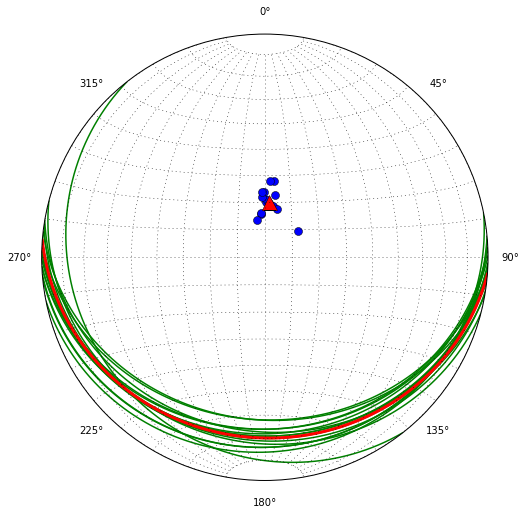

Site SS21
Mean strike = 94.36 Mean dip = 20.20


In [63]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

SS21_mean_strike = SS21_poles_mean['dec'] + 90.0
SS21_mean_dip = 90.0 - SS21_poles_mean['inc']

ax.plane(SS21_analysis['dip_dir']-90,SS21_analysis['dip'], 'g-', linewidth=1.5)
ax.pole(SS21_analysis['dip_dir']-90,SS21_analysis['dip'], 'bo', markersize=8)
ax.plane(SS21_mean_strike,SS21_mean_dip, 'r-', linewidth=3)
ax.pole(SS21_mean_strike,SS21_mean_dip, 'r^', markersize=15)
ax.grid()

plt.show()
print "Site SS21"
print "Mean strike = %3.2f Mean dip = %3.2f" % (SS21_mean_strike,SS21_mean_dip)

site_means.loc['SS21'] = pd.Series({'site_name':'SS21',
                               'mean_strike':SS21_mean_strike, 
                               'mean_dip':SS21_mean_dip,'section':'SSc'})

### SS16

In [64]:
SS16 = SS_all.loc["SS16"]
SS16_joint = SS16.loc[SS16["planeType"]=="Joint"]

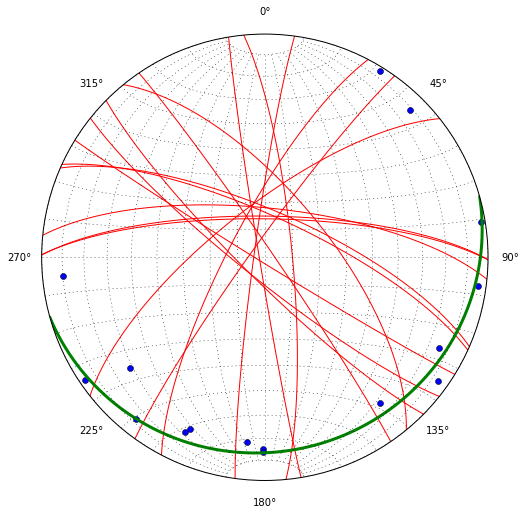

Site SS16
This analysis of columnar joints gives an estimated strike/dip of 74.29/13.96


In [65]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

ax.pole(SS16_joint["dipAz_dc"]-90,SS16_joint["dip"])
ax.plane(SS16_joint["dipAz_dc"]-90,SS16_joint["dip"], 'r-', linewidth=1)
s,d=mplstereonet.fit_girdle(SS16_joint["dipAz_dc"]-90,SS16_joint["dip"])
ax.plane(s,d, linewidth=3)
ax.grid()

plt.show()
print "Site SS16"
print "This analysis of columnar joints gives an estimated strike/dip of \
%3.2f/%3.2f" % (s,d)

In [66]:
SS16_bed = SS16.loc[SS16["planeType"]!="Joint"]
SS16_analysis = pd.DataFrame(columns=["dip","dip_dir","pole_trend", "pole_plunge"])
SS16_analysis["dip"] = SS16_bed['dip']
SS16_analysis["dip_dir"] = SS16_bed['dipAz_dc']
SS16_analysis['pole_trend'] = (SS16_bed['dipAz_dc']+180)%360
SS16_analysis['pole_plunge'] = 90 - SS16_bed['dip']
SS16_analysis = SS16_analysis.append(pd.Series({"dip":d,"dip_dir":s+90,"pole_trend":s-90,"pole_plunge":90-d}), ignore_index=True)
SS16_analysis.head()

dip     dip_dir  pole_trend  pole_plunge
0  16.0  162.582039  342.582039         74.0
1  10.0  172.582039  352.582039         80.0
2  23.0  184.582039    4.582039         67.0
3  15.0  156.582039  336.582039         75.0
4  14.0  184.582039    4.582039         76.0

In [67]:
SS16_poles = ipmag.make_di_block(SS16_analysis['pole_trend'],SS16_analysis['pole_plunge'])
SS16_poles_mean = pmag.fisher_mean(SS16_poles)
SS16_poles_mean

{'alpha95': 2.1392276225298783,
 'csd': 6.2179013331496522,
 'dec': 0.25933486938175482,
 'inc': 72.964391464719128,
 'k': 169.70021211888471,
 'n': 27,
 'r': 26.846788641714923}

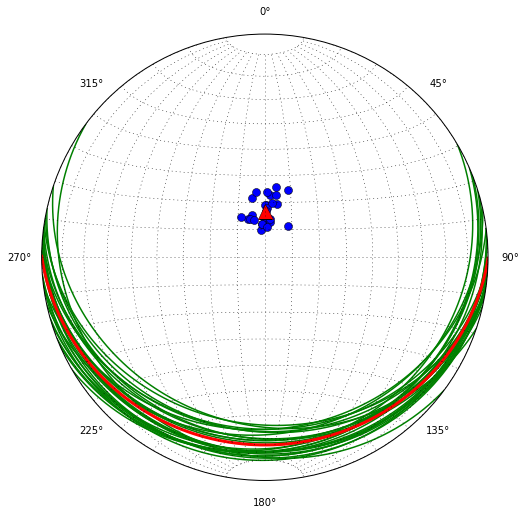

Site SS16
Mean strike = 90.26 Mean dip = 17.04


In [68]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

SS16_mean_strike = SS16_poles_mean['dec'] + 90.0
SS16_mean_dip = 90.0 - SS16_poles_mean['inc']

ax.plane(SS16_analysis['dip_dir']-90,SS16_analysis['dip'], 'g-', linewidth=1.5)
ax.pole(SS16_analysis['dip_dir']-90,SS16_analysis['dip'], 'bo', markersize=8)
ax.plane(SS16_mean_strike,SS16_mean_dip, 'r-', linewidth=3)
ax.pole(SS16_mean_strike,SS16_mean_dip, 'r^', markersize=15)
ax.grid()

plt.show()
print "Site SS16"
print "Mean strike = %3.2f Mean dip = %3.2f" % (SS16_mean_strike,SS16_mean_dip)

site_means.loc['SS16'] = pd.Series({'site_name':'SS16',
                               'mean_strike':SS16_mean_strike, 
                               'mean_dip':SS16_mean_dip,
                                   'section':'SSc'})

### SS17

In [69]:
SS17 = SS_all.loc["SS17"]
SS17_joint = SS17.loc[SS17["planeType"]=="Joint"]

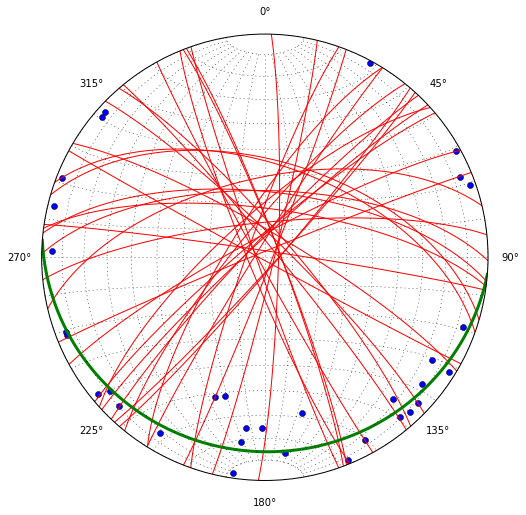

Site SS17
This analysis of columnar joints gives an estimated strike/dip of 94.37/13.97


In [70]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

ax.pole(SS17_joint["dipAz_dc"]-90,SS17_joint["dip"])
ax.plane(SS17_joint["dipAz_dc"]-90,SS17_joint["dip"], 'r-', linewidth=1)
s,d=mplstereonet.fit_girdle(SS17_joint["dipAz_dc"]-90,SS17_joint["dip"])
ax.plane(s,d, linewidth=3)
ax.grid()

plt.show()
print "Site SS17"
print "This analysis of columnar joints gives an estimated strike/dip of \
%3.2f/%3.2f" % (s,d)

In [71]:
SS17_bed = SS17.loc[SS17["planeType"]!="Joint"]
SS17_analysis = pd.DataFrame(columns=["dip","dip_dir","pole_trend", "pole_plunge"])
SS17_analysis["dip"] = SS17_bed['dip']
SS17_analysis["dip_dir"] = SS17_bed['dipAz_dc']
SS17_analysis['pole_trend'] = (SS17_bed['dipAz_dc']+180)%360
SS17_analysis['pole_plunge'] = 90 - SS17_bed['dip']
SS17_analysis = SS17_analysis.append(pd.Series({"dip":d,"dip_dir":s+90,"pole_trend":s-90,"pole_plunge":90-d}), ignore_index=True)
SS17_analysis.head()

dip     dip_dir  pole_trend  pole_plunge
0  18.0  184.659080    4.659080         72.0
1   8.0  191.659080   11.659080         82.0
2  17.0  210.659081   30.659081         73.0
3  20.0  180.582039    0.582039         70.0
4  21.0  162.582039  342.582039         69.0

In [72]:
SS17_poles = ipmag.make_di_block(SS17_analysis['pole_trend'],SS17_analysis['pole_plunge'])
SS17_poles_mean = pmag.fisher_mean(SS17_poles)
SS17_poles_mean

{'alpha95': 1.6633642003074991,
 'csd': 5.0261831517085582,
 'dec': 359.42666896230185,
 'inc': 73.203414035348459,
 'k': 259.71283782397711,
 'n': 29,
 'r': 28.892188617880425}

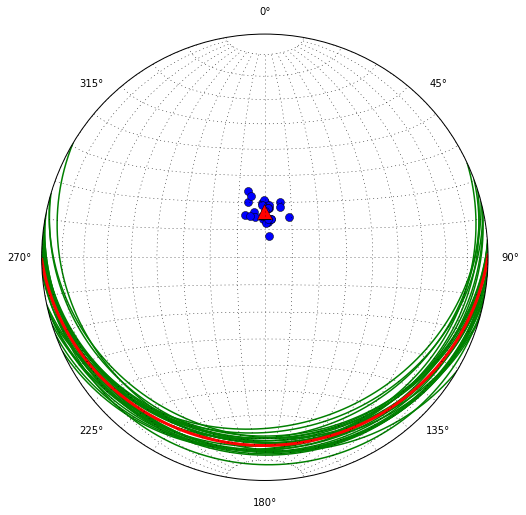

Site SS16
Mean strike = 449.43 Mean dip = 16.80


In [73]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

SS17_mean_strike = SS17_poles_mean['dec'] + 90.0
SS17_mean_dip = 90.0 - SS17_poles_mean['inc']

ax.plane(SS17_analysis['dip_dir']-90,SS17_analysis['dip'], 'g-', linewidth=1.5)
ax.pole(SS17_analysis['dip_dir']-90,SS17_analysis['dip'], 'bo', markersize=8)
ax.plane(SS17_mean_strike,SS17_mean_dip, 'r-', linewidth=3)
ax.pole(SS17_mean_strike,SS17_mean_dip, 'r^', markersize=15)
ax.grid()

plt.show()
print "Site SS16"
print "Mean strike = %3.2f Mean dip = %3.2f" % (SS17_mean_strike,SS17_mean_dip)

site_means.loc['SS17'] = pd.Series({'site_name':'SS17',
                               'mean_strike':SS17_mean_strike, 
                               'mean_dip':SS17_mean_dip,
                                   'section':'SSc'})

[Go to top](# Michipicoten Structural Analysis)

## East Sand Bay Member at base of SSa section

In [74]:
#Joint analysis N/A
ESB_bed = ESB_all.loc[ESB_all["planeType"]!="Joint"]
ESB_analysis = pd.DataFrame(columns=["dip","dip_dir","pole_trend", "pole_plunge"])
ESB_analysis["dip"] = ESB_bed['dip']
ESB_analysis["dip_dir"] = ESB_bed['dipAz_dc']
ESB_analysis['pole_trend'] = (ESB_bed['dipAz_dc']+180)%360
ESB_analysis['pole_plunge'] = 90 - ESB_bed['dip']

ESB_analysis.head()

dip     dip_dir  pole_trend  pole_plunge
unitId                                                              
East Sand Bay Member  31.108337  239.477341   59.477341    58.891663
East Sand Bay Member  29.558538  221.475327   41.475327    60.441462
East Sand Bay Member  22.374222  248.997315   68.997315    67.625778
East Sand Bay Member  18.713396  252.892990   72.892990    71.286604
East Sand Bay Member   4.891103   75.692642  255.692642    85.108897

In [75]:
ESB_poles = ipmag.make_di_block(ESB_analysis['pole_trend'],ESB_analysis['pole_plunge'])
ESB_poles_mean = pmag.fisher_mean(ESB_poles)
ESB_poles_mean

{'alpha95': 11.679353342141916,
 'csd': 13.919939776336854,
 'dec': 53.68278447103112,
 'inc': 70.486033279071805,
 'k': 33.860652680518044,
 'n': 6,
 'r': 5.8523359827946617}

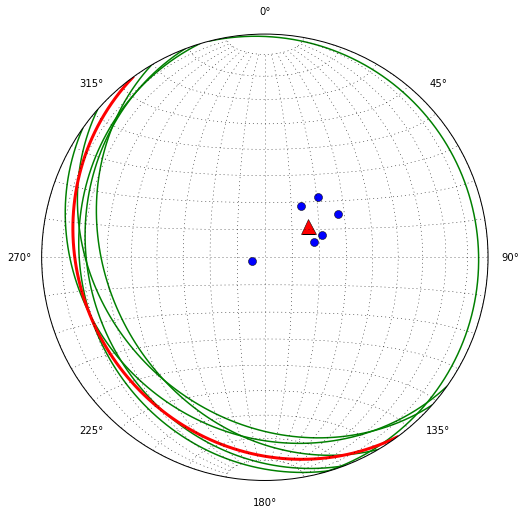

East Sand Bay Member (no paleomagnetic data)
Mean strike = 143.68 Mean dip = 19.51


In [76]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

ESB_mean_strike = ESB_poles_mean['dec'] + 90.0
ESB_mean_dip = 90.0 - ESB_poles_mean['inc']

ax.plane(ESB_analysis['dip_dir']-90,ESB_analysis['dip'], 'g-', linewidth=1.5)
ax.pole(ESB_analysis['dip_dir']-90,ESB_analysis['dip'], 'bo', markersize=8)
ax.plane(ESB_mean_strike,ESB_mean_dip, 'r-', linewidth=3)
ax.pole(ESB_mean_strike,ESB_mean_dip, 'r^', markersize=15)
ax.grid()

plt.show()
print "East Sand Bay Member (no paleomagnetic data)"
print "Mean strike = %3.2f Mean dip = %3.2f" % (ESB_mean_strike,ESB_mean_dip)

site_means.loc['ESB'] = pd.Series({'site_name':'ESB basal SSa',
                               'mean_strike':ESB_mean_strike, 
                               'mean_dip':ESB_mean_dip,
                                  'section':'SSa'})

## SSa section

A majority of measurements are from intercalated siltstone beds in SSa region of South Shore flows (eastern peninsula).
   * [SS2](#SS2)
   * [SS3](#SS3)
   * [SS11](#SS11)
   * [SS14](#SS14)
   * [SS15](#SS15)
   * [Interflow carbonate](#Interflow-siltstone-beds)

### SS14

In [77]:
SS14 = SS_all.loc["SS14"]

In [78]:
SS14_bed = SS14.loc[SS14["planeType"]!="Joint"]
SS14_analysis = pd.DataFrame(columns=["dip","dip_dir","pole_trend", "pole_plunge"])
SS14_analysis["dip"] = SS14_bed['dip']
SS14_analysis["dip_dir"] = SS14_bed['dipAz_dc']
SS14_analysis['pole_trend'] = (SS14_bed['dipAz_dc']+180)%360
SS14_analysis['pole_plunge'] = 90 - SS14_bed['dip']

SS14_analysis.head()

dip     dip_dir  pole_trend  pole_plunge
unitId                                                
SS14    17.000000  258.582039   78.582039    73.000000
SS14    21.869751  246.054306   66.054306    68.130249
SS14    10.464280  279.500427   99.500427    79.535720
SS14    22.000000  268.582039   88.582039    68.000000
SS14    28.000000  290.582039  110.582039    62.000000

In [79]:
SS14_poles = ipmag.make_di_block(SS14_analysis['pole_trend'],SS14_analysis['pole_plunge'])
SS14_poles_mean = pmag.fisher_mean(SS14_poles)
SS14_poles_mean

{'alpha95': 5.8606152160582043,
 'csd': 9.7578387252162067,
 'dec': 83.819004792770897,
 'inc': 70.457264458071307,
 'k': 68.906908514992693,
 'n': 10,
 'r': 9.8693890033095624}

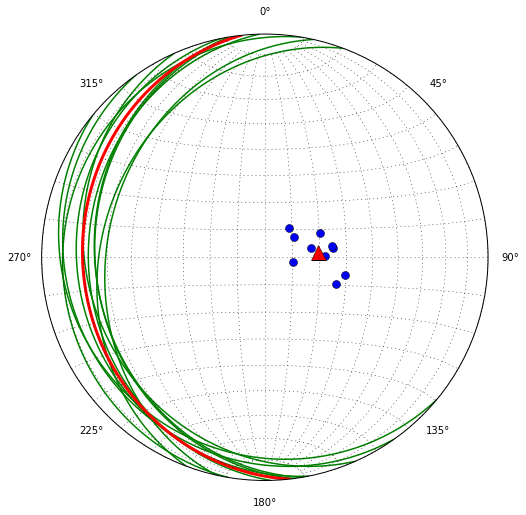

Site SS14
Mean strike = 173.82 Mean dip = 19.54


In [80]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

SS14_mean_strike = SS14_poles_mean['dec'] + 90.0
SS14_mean_dip = 90.0 - SS14_poles_mean['inc']

ax.plane(SS14_analysis['dip_dir']-90,SS14_analysis['dip'], 'g-', linewidth=1.5)
ax.pole(SS14_analysis['dip_dir']-90,SS14_analysis['dip'], 'bo', markersize=8)
ax.plane(SS14_mean_strike,SS14_mean_dip, 'r-', linewidth=3)
ax.pole(SS14_mean_strike,SS14_mean_dip, 'r^', markersize=15)
ax.grid()

plt.show()
print "Site SS14"
print "Mean strike = %3.2f Mean dip = %3.2f" % (SS14_mean_strike,SS14_mean_dip)

site_means.loc['SS14'] = pd.Series({'site_name':'SS14',
                               'mean_strike':SS14_mean_strike, 
                               'mean_dip':SS14_mean_dip,
                                  'section':'SSa'})

### SS11

In [81]:
SS11 = SS_all.loc["SS11"]

In [82]:
SS11_bed = SS11.loc[SS11["planeType"]!="Joint"]
SS11_analysis = pd.DataFrame(columns=["dip","dip_dir","pole_trend", "pole_plunge"])
SS11_analysis["dip"] = SS11_bed['dip']
SS11_analysis["dip_dir"] = SS11_bed['dipAz_dc']
SS11_analysis['pole_trend'] = (SS11_bed['dipAz_dc']+180)%360
SS11_analysis['pole_plunge'] = 90 - SS11_bed['dip']

SS11_analysis.head()

dip     dip_dir  pole_trend  pole_plunge
unitId                                           
SS11    27.0  248.582039   68.582039         63.0
SS11    13.0  200.582039   20.582039         77.0
SS11    10.0  228.582039   48.582039         80.0
SS11    18.0  227.582039   47.582039         72.0
SS11    15.0  174.582039  354.582039         75.0

In [83]:
SS11_poles = ipmag.make_di_block(SS11_analysis['pole_trend'],SS11_analysis['pole_plunge'])
SS11_poles_mean = pmag.fisher_mean(SS11_poles)
SS11_poles_mean

{'alpha95': 4.4581131164674073,
 'csd': 9.3820987925096073,
 'dec': 43.047775842788795,
 'inc': 72.111865533441375,
 'k': 74.536678242264472,
 'n': 15,
 'r': 14.812173008911181}

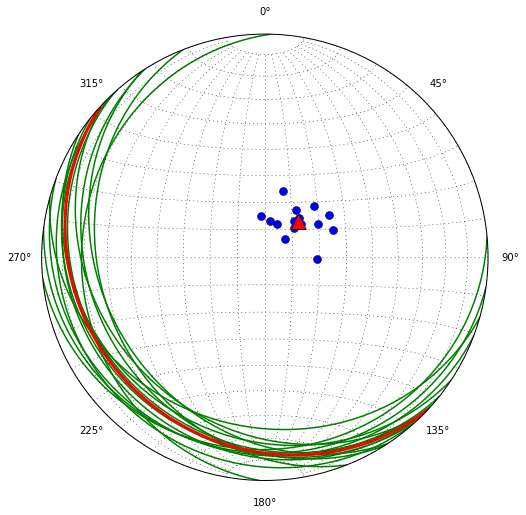

Site SS11
Mean strike = 133.05 Mean dip = 17.89


In [84]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

SS11_mean_strike = SS11_poles_mean['dec'] + 90.0
SS11_mean_dip = 90.0 - SS11_poles_mean['inc']

ax.plane(SS11_analysis['dip_dir']-90,SS11_analysis['dip'], 'g-', linewidth=1.5)
ax.pole(SS11_analysis['dip_dir']-90,SS11_analysis['dip'], 'bo', markersize=8)
ax.plane(SS11_mean_strike,SS11_mean_dip, 'r-', linewidth=3)
ax.pole(SS11_mean_strike,SS11_mean_dip, 'r^', markersize=15)
ax.grid()

plt.show()
print "Site SS11"
print "Mean strike = %3.2f Mean dip = %3.2f" % (SS11_mean_strike,SS11_mean_dip)

site_means.loc['SS11'] = pd.Series({'site_name':'SS11',
                               'mean_strike':SS11_mean_strike, 
                               'mean_dip':SS11_mean_dip,
                                  'section':'SSa'})

### SS2

In [85]:
SS2 = SS_all.loc["SS2"]

In [86]:
SS2_bed = SS2.loc[SS2["planeType"]!="Joint"]
SS2_analysis = pd.DataFrame(columns=["dip","dip_dir","pole_trend", "pole_plunge"])
SS2_analysis["dip"] = SS2_bed['dip']
SS2_analysis["dip_dir"] = SS2_bed['dipAz_dc']
SS2_analysis['pole_trend'] = (SS2_bed['dipAz_dc']+180)%360
SS2_analysis['pole_plunge'] = 90 - SS2_bed['dip']

SS2_analysis

dip     dip_dir  pole_trend  pole_plunge
unitId                                           
SS2     36.0  215.582039   35.582039         54.0
SS2     20.0  218.582039   38.582039         70.0
SS2     25.0  219.582039   39.582039         65.0
SS2     26.0  238.582039   58.582039         64.0
SS2     25.0  240.582039   60.582039         65.0
SS2     40.0  223.582039   43.582039         50.0

In [87]:
SS2_poles = ipmag.make_di_block(SS2_analysis['pole_trend'],SS2_analysis['pole_plunge'])
SS2_poles_mean = pmag.fisher_mean(SS2_poles)
SS2_poles_mean

{'alpha95': 7.5828123170075292,
 'csd': 9.1115681128952346,
 'dec': 45.533935993193673,
 'inc': 61.679769018261858,
 'k': 79.028508506405643,
 'n': 6,
 'r': 5.9367316922146554}

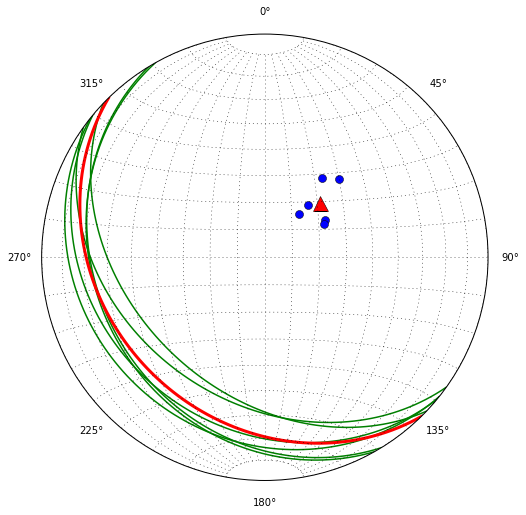

Site SS2
Mean strike = 135.53 Mean dip = 28.32


In [88]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

SS2_mean_strike = SS2_poles_mean['dec'] + 90.0
SS2_mean_dip = 90.0 - SS2_poles_mean['inc']

ax.plane(SS2_analysis['dip_dir']-90,SS2_analysis['dip'], 'g-', linewidth=1.5)
ax.pole(SS2_analysis['dip_dir']-90,SS2_analysis['dip'], 'bo', markersize=8)
ax.plane(SS2_mean_strike,SS2_mean_dip, 'r-', linewidth=3)
ax.pole(SS2_mean_strike,SS2_mean_dip, 'r^', markersize=15)
ax.grid()

plt.show()
print "Site SS2"
print "Mean strike = %3.2f Mean dip = %3.2f" % (SS2_mean_strike,SS2_mean_dip)

site_means.loc['SS2'] = pd.Series({'site_name':'SS2',
                               'mean_strike':SS2_mean_strike, 
                               'mean_dip':SS2_mean_dip,
                                  'section':'SSa'})

### SS3

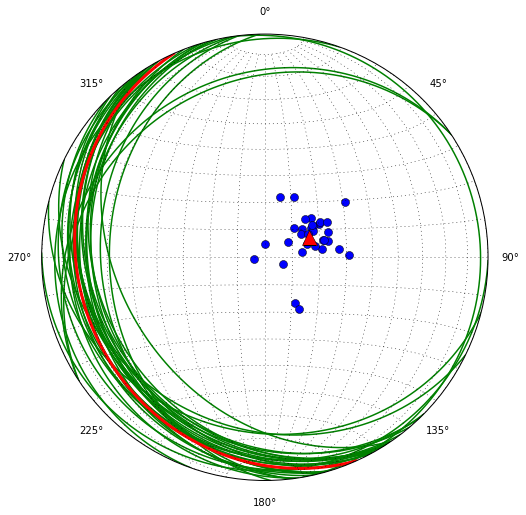

Site SS3
Mean strike = 155.90 Mean dip = 17.70


In [89]:
SS3 = SS_all.loc["SS3"]
SS3_bed = SS3.loc[SS3["planeType"]!="Joint"]
SS3_analysis = pd.DataFrame(columns=["dip","dip_dir","pole_trend", "pole_plunge"])
SS3_analysis["dip"] = SS3_bed['dip']
SS3_analysis["dip_dir"] = SS3_bed['dipAz_dc']
SS3_analysis['pole_trend'] = (SS3_bed['dipAz_dc']+180)%360
SS3_analysis['pole_plunge'] = 90 - SS3_bed['dip']

SS3_poles = ipmag.make_di_block(SS3_analysis['pole_trend'],SS3_analysis['pole_plunge'])
SS3_poles_mean = pmag.fisher_mean(SS3_poles)

SS3_poles = ipmag.make_di_block(SS3_analysis['pole_trend'],SS3_analysis['pole_plunge'])
SS3_poles_mean = pmag.fisher_mean(SS3_poles)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

SS3_mean_strike = SS3_poles_mean['dec'] + 90.0
SS3_mean_dip = 90.0 - SS3_poles_mean['inc']

ax.plane(SS3_analysis['dip_dir']-90,SS3_analysis['dip'], 'g-', linewidth=1.5)
ax.pole(SS3_analysis['dip_dir']-90,SS3_analysis['dip'], 'bo', markersize=8)
ax.plane(SS3_mean_strike,SS3_mean_dip, 'r-', linewidth=3)
ax.pole(SS3_mean_strike,SS3_mean_dip, 'r^', markersize=15)
ax.grid()

plt.show()
print "Site SS3"
print "Mean strike = %3.2f Mean dip = %3.2f" % (SS3_mean_strike,SS3_mean_dip)

site_means.loc['SS3'] = pd.Series({'site_name':'SS3',
                               'mean_strike':SS3_mean_strike, 
                               'mean_dip':SS3_mean_dip,
                                  'section':'SSa'})

### SS15

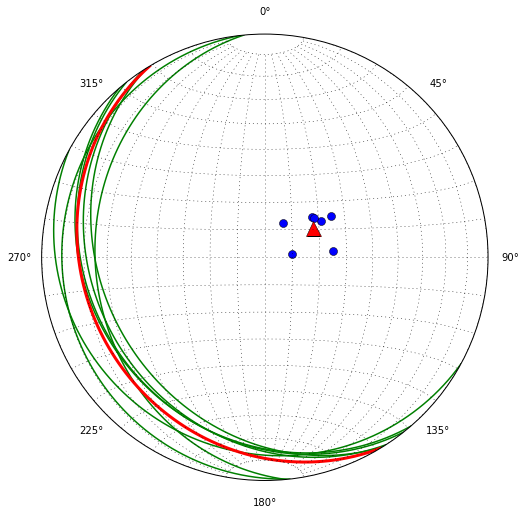

Site SS15
Mean strike = 148.90 Mean dip = 20.34


In [90]:
SS15 = SS_all.loc["SS15"]
SS15_bed = SS15.loc[SS15["planeType"]!="Joint"]
SS15_analysis = pd.DataFrame(columns=["dip","dip_dir","pole_trend", "pole_plunge"])
SS15_analysis["dip"] = SS15_bed['dip']
SS15_analysis["dip_dir"] = SS15_bed['dipAz_dc']
SS15_analysis['pole_trend'] = (SS15_bed['dipAz_dc']+180)%360
SS15_analysis['pole_plunge'] = 90 - SS15_bed['dip']

SS15_poles = ipmag.make_di_block(SS15_analysis['pole_trend'],SS15_analysis['pole_plunge'])
SS15_poles_mean = pmag.fisher_mean(SS15_poles)

SS15_poles = ipmag.make_di_block(SS15_analysis['pole_trend'],SS15_analysis['pole_plunge'])
SS15_poles_mean = pmag.fisher_mean(SS15_poles)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

SS15_mean_strike = SS15_poles_mean['dec'] + 90.0
SS15_mean_dip = 90.0 - SS15_poles_mean['inc']

ax.plane(SS15_analysis['dip_dir']-90,SS15_analysis['dip'], 'g-', linewidth=1.5)
ax.pole(SS15_analysis['dip_dir']-90,SS15_analysis['dip'], 'bo', markersize=8)
ax.plane(SS15_mean_strike,SS15_mean_dip, 'r-', linewidth=3)
ax.pole(SS15_mean_strike,SS15_mean_dip, 'r^', markersize=15)
ax.grid()

plt.show()
print "Site SS15"
print "Mean strike = %3.2f Mean dip = %3.2f" % (SS15_mean_strike,SS15_mean_dip)

site_means.loc['SS15'] = pd.Series({'site_name':'SS15',
                               'mean_strike':SS15_mean_strike, 
                               'mean_dip':SS15_mean_dip,
                                   'section':'SSa'})

## Carbonate bed

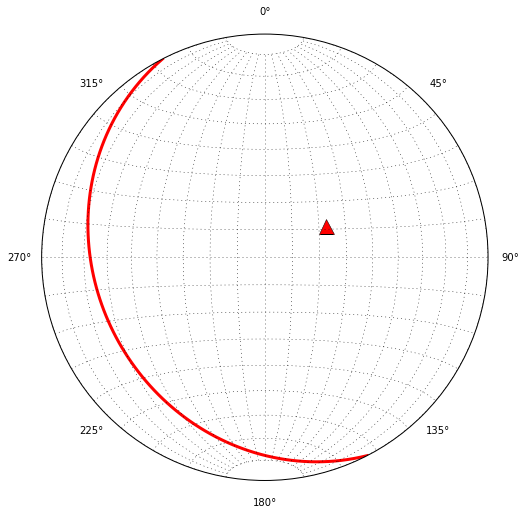

SSa limestone bed
Mean strike = 152.72 Mean dip = 25.31


In [91]:
SSa_limestone = SS_all.loc["SSa limestone"]
SSa_lime_bed = SSa_limestone#.loc[SSa_limestone["planeType"]!="Joint"]
SSa_lime_analysis = pd.DataFrame(columns=["dip","dip_dir","pole_trend", "pole_plunge"])
SSa_lime_analysis["dip"] = SSa_lime_bed['dip']
SSa_lime_analysis["dip_dir"] = SSa_lime_bed['dipAz_dc']
SSa_lime_analysis['pole_trend'] = (SSa_lime_bed['dipAz_dc']+180)%360
SSa_lime_analysis['pole_plunge'] = 90 - SSa_lime_bed['dip']



fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

SSa_limestone_mean_strike = SSa_limestone['dipAz_dc'] - 90.0
SSa_limestone_mean_dip = SSa_limestone['dip']

ax.plane(SSa_lime_analysis['dip_dir']-90,SSa_lime_analysis['dip'], 'g-', linewidth=1.5)
ax.pole(SSa_lime_analysis['dip_dir']-90,SSa_lime_analysis['dip'], 'bo', markersize=8)
ax.plane(SSa_limestone_mean_strike,SSa_limestone_mean_dip, 'r-', linewidth=3)
ax.pole(SSa_limestone_mean_strike,SSa_limestone_mean_dip, 'r^', markersize=15)
ax.grid()

plt.show()
print "SSa limestone bed"
print "Mean strike = %3.2f Mean dip = %3.2f" % (SSa_limestone_mean_strike,SSa_limestone_mean_dip)

site_means.loc['SSa_limestone'] = pd.Series({'site_name':'SSa_limestone',
                               'mean_strike':SSa_limestone_mean_strike, 
                               'mean_dip':SSa_limestone_mean_dip,
                                   'section':'SSa'})

# SSa MEAN

In [92]:
SSa = site_means.loc[site_means['section']=='SSa']
SSb = site_means.loc[site_means['section']=='SSb']
SSc = site_means.loc[site_means['section']=='SSc']

For the SSa region, we take a mean of all measured sites to obtain an overall average orientation for paleomagnetic tilt correction.

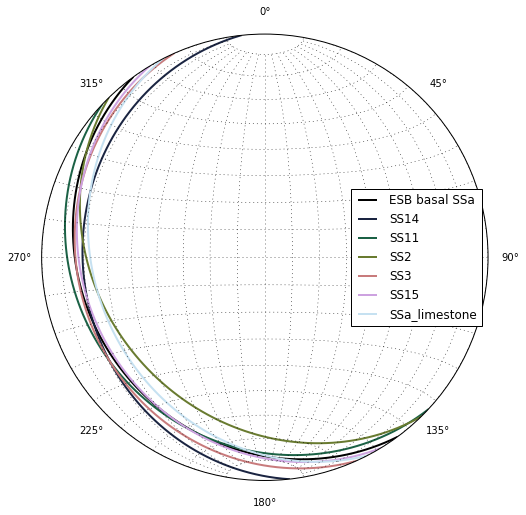

In [93]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='stereonet')
helix = cm = plt.get_cmap('cubehelix') 
cNorm  = colors.Normalize(vmin=0, vmax=len(SSa))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=helix)
j=0

for i in SSa.index:
    loc = SSa.loc[i]
    colorVal = scalarMap.to_rgba(j)
    ax.plane(loc["mean_strike"],loc["mean_dip"],c=colorVal,label=loc['site_name'],linewidth=2)
    j += 1

ax.grid()
plt.legend(loc="right")

plt.show(fig)

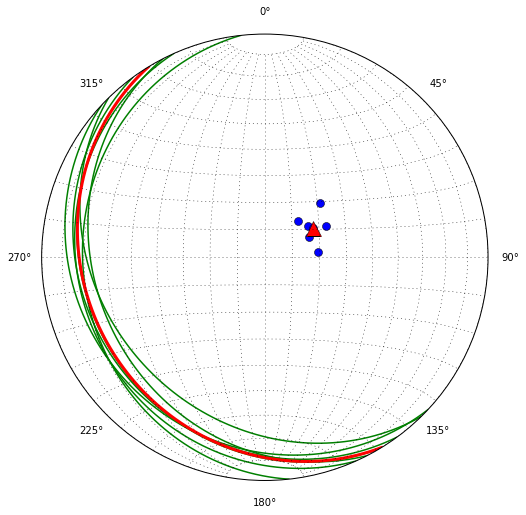

SSa mean strike: 148.492948275 SSa mean dip: 20.7656225623 Alpha_95: 4.71272241392


In [94]:
SSa_analysis = pd.DataFrame(columns=["mean_strike", "mean_dip", "pole_trend", "pole_plunge"])
SSa_analysis["mean_strike"] = SSa["mean_strike"]
SSa_analysis["mean_dip"] = SSa["mean_dip"]
SSa_analysis['pole_trend'] = (SSa['mean_strike']-90)%360
SSa_analysis['pole_plunge'] = 90 - SSa['mean_dip']

SSa_poles = ipmag.make_di_block(SSa_analysis['pole_trend'],SSa_analysis['pole_plunge'])
SSa_poles_mean = pmag.fisher_mean(SSa_poles)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

SSa_mean_strike = SSa_poles_mean['dec'] + 90.0
SSa_mean_dip = 90.0 - SSa_poles_mean['inc']

ax.plane(SSa_analysis['mean_strike'],SSa_analysis['mean_dip'], 'g-', linewidth=1.5)
ax.pole(SSa_analysis['mean_strike'],SSa_analysis['mean_dip'], 'bo', markersize=8)
ax.plane(SSa_mean_strike,SSa_mean_dip, 'r-', linewidth=3)
ax.pole(SSa_mean_strike,SSa_mean_dip, 'r^', markersize=15)
ax.grid()

plt.show()

print "SSa mean strike:", SSa_mean_strike, "SSa mean dip:", SSa_mean_dip,"Alpha_95:", SSa_poles_mean["alpha95"]

# SSb MEAN

For the SSb region, SS6 and SS7 are palpably the most numerous and best quality measurements, and based on their precise agreement, we take them as representative of the whole SSb region.

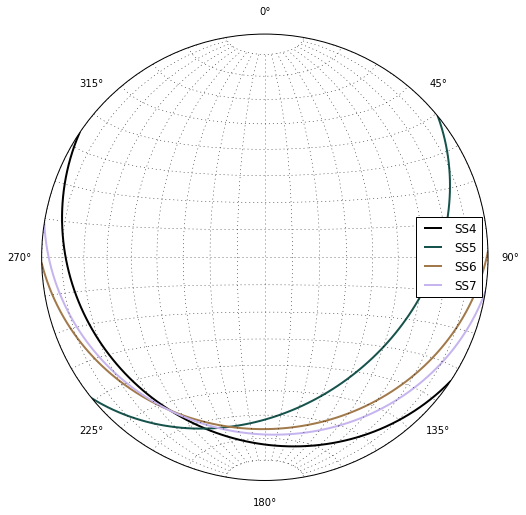

In [95]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='stereonet')
helix = cm = plt.get_cmap('cubehelix') 
cNorm  = colors.Normalize(vmin=0, vmax=len(SSb))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=helix)
j=0

for i in SSb.index:
    loc = SSb.loc[i]
    colorVal = scalarMap.to_rgba(j)
    ax.plane(loc["mean_strike"],loc["mean_dip"],c=colorVal,label=loc['site_name'],linewidth=2)
    j += 1

ax.grid()
plt.legend(loc="right")

plt.show(fig)

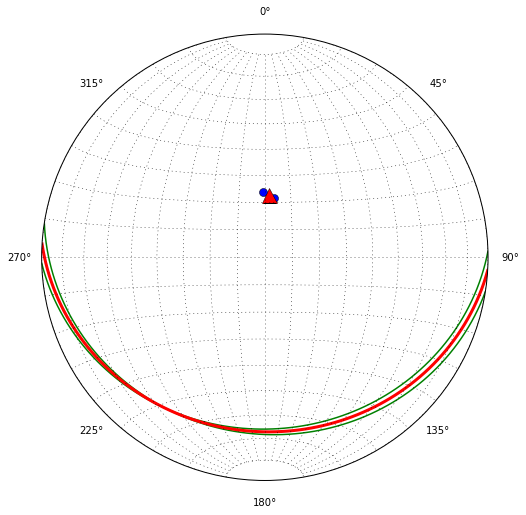

SSb mean strike: 93.4269246626 SSb mean dip: 22.8984235417 Alpha_95: 9.98374854059


In [96]:
#Take out SS4 and SS5 (unreliable measurements). 
#SS6 and SS7 measurements are in good agreement, so we take
# them to be representative of SSb region.
SSb_filtered = SSb.loc[["SS6","SS7"]]

SSb_analysis = pd.DataFrame(columns=["mean_strike", "mean_dip", "pole_trend", "pole_plunge"])
SSb_analysis["mean_strike"] = SSb_filtered["mean_strike"]
SSb_analysis["mean_dip"] = SSb_filtered["mean_dip"]
SSb_analysis['pole_trend'] = (SSb_filtered['mean_strike']-90)%360
SSb_analysis['pole_plunge'] = 90 - SSb_filtered['mean_dip']

SSb_poles = ipmag.make_di_block(SSb_analysis['pole_trend'],SSb_analysis['pole_plunge'])
SSb_poles_mean = pmag.fisher_mean(SSb_poles)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

SSb_mean_strike = SSb_poles_mean['dec'] + 90.0
SSb_mean_dip = 90.0 - SSb_poles_mean['inc']

ax.plane(SSb_analysis['mean_strike'],SSb_analysis['mean_dip'], 'g-', linewidth=1.5)
ax.pole(SSb_analysis['mean_strike'],SSb_analysis['mean_dip'], 'bo', markersize=8)
ax.plane(SSb_mean_strike,SSb_mean_dip, 'r-', linewidth=3)
ax.pole(SSb_mean_strike,SSb_mean_dip, 'r^', markersize=15)
ax.grid()

plt.show()

print "SSb mean strike:", SSb_mean_strike, "SSb mean dip:", SSb_mean_dip,"Alpha_95:", SSb_poles_mean["alpha95"]

# SSc MEAN

For the SSc region, we filter out data from unspecified locations, as these data are contain no abnormalities needing to be taken into account. We then take a broad mean of all sites in this region.

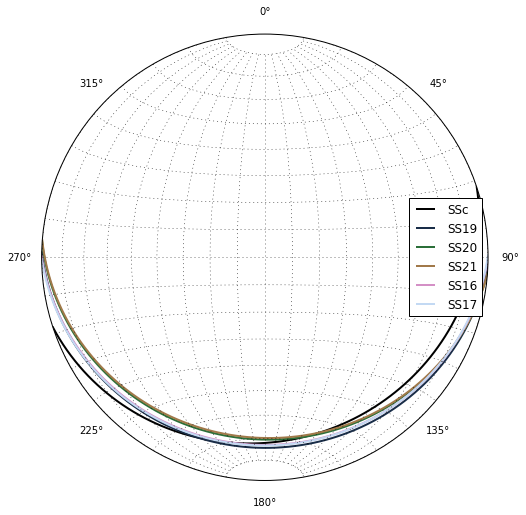

In [97]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='stereonet')
helix = cm = plt.get_cmap('cubehelix') 
cNorm  = colors.Normalize(vmin=0, vmax=len(SSc))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=helix)
j=0

for i in SSc.index:
    loc = SSc.loc[i]
    colorVal = scalarMap.to_rgba(j)
    ax.plane(loc["mean_strike"],loc["mean_dip"],c=colorVal,label=loc['site_name'],linewidth=2)
    j += 1

ax.grid()
plt.legend(loc="right")

plt.show(fig)

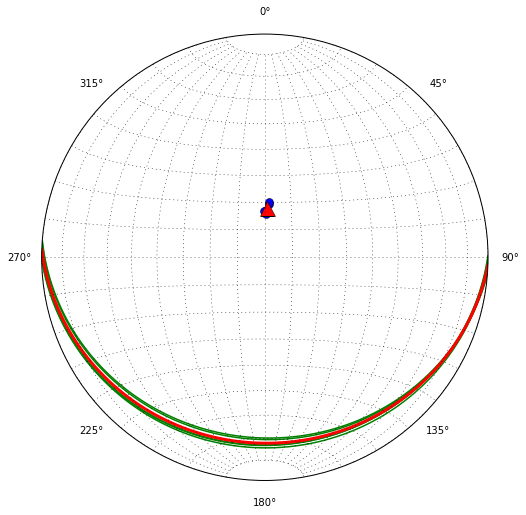

SSc mean strike: 92.0132805077 SSc mean dip: 17.8350639065 Alpha_95: 1.9078646725


In [98]:
#Take out SSc (unspecified measurements), and take 
SSc_filtered = SSc.loc[["SS19","SS20","SS21","SS16","SS17"]]

SSc_analysis = pd.DataFrame(columns=["mean_strike", "mean_dip", "pole_trend", "pole_plunge"])
SSc_analysis["mean_strike"] = SSc_filtered["mean_strike"]
SSc_analysis["mean_dip"] = SSc_filtered["mean_dip"]
SSc_analysis['pole_trend'] = (SSc_filtered['mean_strike']-90)%360
SSc_analysis['pole_plunge'] = 90 - SSc_filtered['mean_dip']

SSc_poles = ipmag.make_di_block(SSc_analysis['pole_trend'],SSc_analysis['pole_plunge'])
SSc_poles_mean = pmag.fisher_mean(SSc_poles)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

SSc_mean_strike = SSc_poles_mean['dec'] + 90.0
SSc_mean_dip = 90.0 - SSc_poles_mean['inc']

ax.plane(SSc_analysis['mean_strike'],SSc_analysis['mean_dip'], 'g-', linewidth=1.5)
ax.pole(SSc_analysis['mean_strike'],SSc_analysis['mean_dip'], 'bo', markersize=8)
ax.plane(SSc_mean_strike,SSc_mean_dip, 'r-', linewidth=3)
ax.pole(SSc_mean_strike,SSc_mean_dip, 'r^', markersize=15)
ax.grid()

plt.show()

print "SSc mean strike:", SSc_mean_strike, "SSc mean dip:", SSc_mean_dip, "Alpha_95:", SSc_poles_mean["alpha95"]